In [3]:
import math
import pickle
import torch
from torch.nn import functional as F
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from pathlib import Path

import sys
sys.path.append('')
from loss import hist_loss_beta, hist_loss, differential_hist
from utils import GIFGenerator

ModuleNotFoundError: No module named 'reid'

## Loading and Visualization

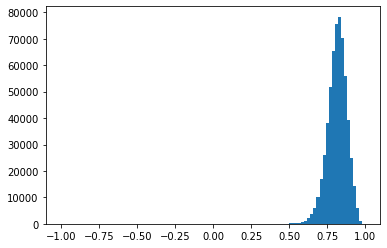

In [2]:
# positive similarities
similarities = torch.load('./similarities.pth')
plt.hist(similarities.detach(), bins=100, range=(-1., 1.))
plt.show()

with open('distribution.pkl', 'rb') as file:
    H_target = pickle.load(file)
H_target = torch.tensor(H_target, dtype=torch.float)
H_target_h = differential_hist(similarities, -1, 1., 100)

## Init Data and Optimizer

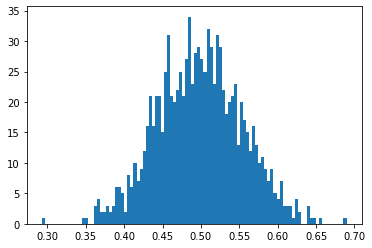

In [3]:
# data = torch.randn(1000, requires_grad=True)
data = (torch.randn(1000, requires_grad=True) / 18 + 0.5).detach().requires_grad_(True)
plt.hist(data.detach(), bins=100)
plt.show()



## Let's Race

### Scatter Fitting

AttributeError: 'list' object has no attribute 'detach'

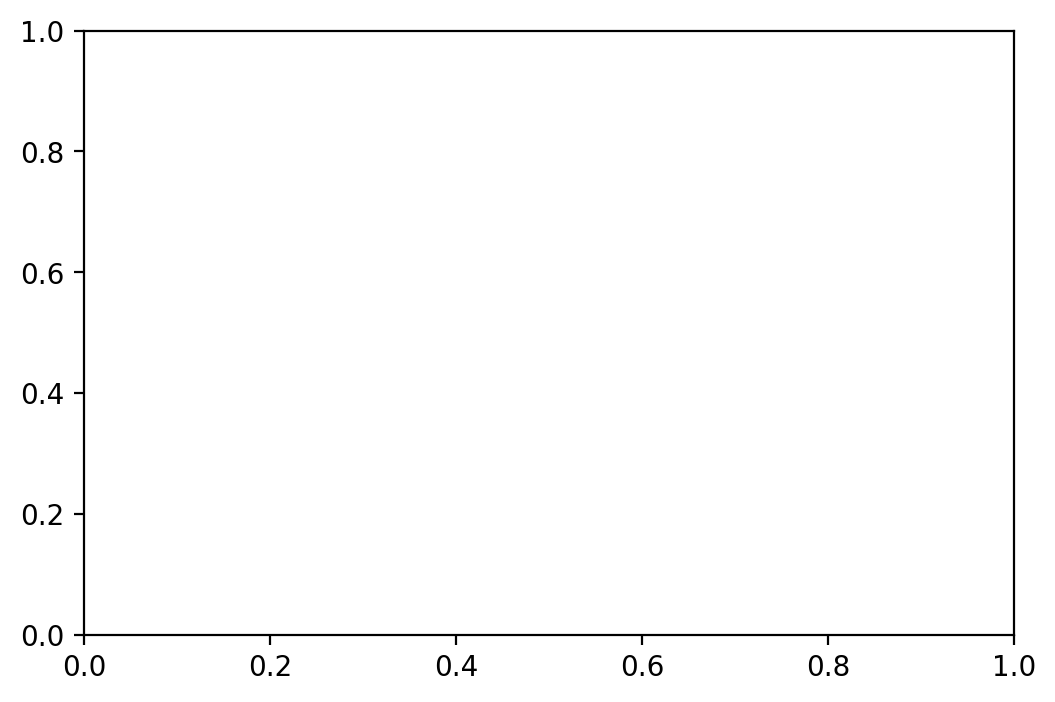

In [16]:
# Gravity

fig, ax = plt.subplots(dpi=200)
gif_maker = GIFGenerator(fig)
data = (torch.randn(1000, requires_grad=True) / 18 + 0.5).detach().requires_grad_(True)
optimizer = torch.optim.SGD([data, ], lr=0.1, momentum=0.9)

STEPS = 5000
for i in range(STEPS):
    loss = hist_loss_beta(data, R=100, H_target=H_target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Step: [{i + 1}] / [{STEPS}], Loss: {loss:.4f}")
    data.data = data.data.clamp_(-0.99, 0.99)

    if (i < 1000 and (i + 1) % 5 == 0) or (i > 1000 and (i + 1) % 20 == 0) or (i > 2500 and (i + 1) % 50 == 0):
        plt.clf()
        plt.plot(H_target)
        plt.scatter(list(range(100)), H_target)

        H_data = data.histc(100, min=-1., max=1.) / data.size(0)
        H_data = H_data.detach()
        plt.plot(H_data)
        plt.scatter(list(range(100)), H_data)
        plt.title(f"Iter: {i + 1}")

        gif_maker.snapshot()
gif_maker.merge('./gravity_normal.gif', duration=0.2)

Step: [1] / [10000], Loss: 0.6669
Step: [2] / [10000], Loss: 0.6663
Step: [3] / [10000], Loss: 0.6655
Step: [4] / [10000], Loss: 0.6643
Step: [5] / [10000], Loss: 0.6627
Step: [6] / [10000], Loss: 0.6609
Step: [7] / [10000], Loss: 0.6586
Step: [8] / [10000], Loss: 0.6560
Step: [9] / [10000], Loss: 0.6533
Step: [10] / [10000], Loss: 0.6502
Step: [11] / [10000], Loss: 0.6471
Step: [12] / [10000], Loss: 0.6440
Step: [13] / [10000], Loss: 0.6409
Step: [14] / [10000], Loss: 0.6380
Step: [15] / [10000], Loss: 0.6349
Step: [16] / [10000], Loss: 0.6317
Step: [17] / [10000], Loss: 0.6291
Step: [18] / [10000], Loss: 0.6266
Step: [19] / [10000], Loss: 0.6244
Step: [20] / [10000], Loss: 0.6226
Step: [21] / [10000], Loss: 0.6208
Step: [22] / [10000], Loss: 0.6185
Step: [23] / [10000], Loss: 0.6168
Step: [24] / [10000], Loss: 0.6144
Step: [25] / [10000], Loss: 0.6122
Step: [26] / [10000], Loss: 0.6101
Step: [27] / [10000], Loss: 0.6067
Step: [28] / [10000], Loss: 0.6031
Step: [29] / [10000], Loss: 0

Step: [235] / [10000], Loss: 0.3512
Step: [236] / [10000], Loss: 0.3508
Step: [237] / [10000], Loss: 0.3504
Step: [238] / [10000], Loss: 0.3499
Step: [239] / [10000], Loss: 0.3495
Step: [240] / [10000], Loss: 0.3491
Step: [241] / [10000], Loss: 0.3488
Step: [242] / [10000], Loss: 0.3482
Step: [243] / [10000], Loss: 0.3478
Step: [244] / [10000], Loss: 0.3474
Step: [245] / [10000], Loss: 0.3469
Step: [246] / [10000], Loss: 0.3464
Step: [247] / [10000], Loss: 0.3460
Step: [248] / [10000], Loss: 0.3457
Step: [249] / [10000], Loss: 0.3453
Step: [250] / [10000], Loss: 0.3449
Step: [251] / [10000], Loss: 0.3445
Step: [252] / [10000], Loss: 0.3441
Step: [253] / [10000], Loss: 0.3436
Step: [254] / [10000], Loss: 0.3433
Step: [255] / [10000], Loss: 0.3428
Step: [256] / [10000], Loss: 0.3424
Step: [257] / [10000], Loss: 0.3419
Step: [258] / [10000], Loss: 0.3415
Step: [259] / [10000], Loss: 0.3411
Step: [260] / [10000], Loss: 0.3406
Step: [261] / [10000], Loss: 0.3402
Step: [262] / [10000], Loss:

Step: [465] / [10000], Loss: 0.2658
Step: [466] / [10000], Loss: 0.2656
Step: [467] / [10000], Loss: 0.2653
Step: [468] / [10000], Loss: 0.2650
Step: [469] / [10000], Loss: 0.2647
Step: [470] / [10000], Loss: 0.2644
Step: [471] / [10000], Loss: 0.2641
Step: [472] / [10000], Loss: 0.2638
Step: [473] / [10000], Loss: 0.2636
Step: [474] / [10000], Loss: 0.2633
Step: [475] / [10000], Loss: 0.2630
Step: [476] / [10000], Loss: 0.2627
Step: [477] / [10000], Loss: 0.2624
Step: [478] / [10000], Loss: 0.2621
Step: [479] / [10000], Loss: 0.2619
Step: [480] / [10000], Loss: 0.2616
Step: [481] / [10000], Loss: 0.2613
Step: [482] / [10000], Loss: 0.2610
Step: [483] / [10000], Loss: 0.2607
Step: [484] / [10000], Loss: 0.2604
Step: [485] / [10000], Loss: 0.2602
Step: [486] / [10000], Loss: 0.2599
Step: [487] / [10000], Loss: 0.2596
Step: [488] / [10000], Loss: 0.2593
Step: [489] / [10000], Loss: 0.2590
Step: [490] / [10000], Loss: 0.2588
Step: [491] / [10000], Loss: 0.2585
Step: [492] / [10000], Loss:

Step: [695] / [10000], Loss: 0.2125
Step: [696] / [10000], Loss: 0.2123
Step: [697] / [10000], Loss: 0.2120
Step: [698] / [10000], Loss: 0.2117
Step: [699] / [10000], Loss: 0.2115
Step: [700] / [10000], Loss: 0.2114
Step: [701] / [10000], Loss: 0.2111
Step: [702] / [10000], Loss: 0.2108
Step: [703] / [10000], Loss: 0.2105
Step: [704] / [10000], Loss: 0.2103
Step: [705] / [10000], Loss: 0.2101
Step: [706] / [10000], Loss: 0.2098
Step: [707] / [10000], Loss: 0.2096
Step: [708] / [10000], Loss: 0.2095
Step: [709] / [10000], Loss: 0.2093
Step: [710] / [10000], Loss: 0.2091
Step: [711] / [10000], Loss: 0.2088
Step: [712] / [10000], Loss: 0.2085
Step: [713] / [10000], Loss: 0.2082
Step: [714] / [10000], Loss: 0.2080
Step: [715] / [10000], Loss: 0.2078
Step: [716] / [10000], Loss: 0.2076
Step: [717] / [10000], Loss: 0.2075
Step: [718] / [10000], Loss: 0.2073
Step: [719] / [10000], Loss: 0.2070
Step: [720] / [10000], Loss: 0.2067
Step: [721] / [10000], Loss: 0.2065
Step: [722] / [10000], Loss:

Step: [925] / [10000], Loss: 0.1703
Step: [926] / [10000], Loss: 0.1702
Step: [927] / [10000], Loss: 0.1701
Step: [928] / [10000], Loss: 0.1699
Step: [929] / [10000], Loss: 0.1697
Step: [930] / [10000], Loss: 0.1695
Step: [931] / [10000], Loss: 0.1693
Step: [932] / [10000], Loss: 0.1692
Step: [933] / [10000], Loss: 0.1690
Step: [934] / [10000], Loss: 0.1688
Step: [935] / [10000], Loss: 0.1687
Step: [936] / [10000], Loss: 0.1685
Step: [937] / [10000], Loss: 0.1683
Step: [938] / [10000], Loss: 0.1682
Step: [939] / [10000], Loss: 0.1680
Step: [940] / [10000], Loss: 0.1678
Step: [941] / [10000], Loss: 0.1677
Step: [942] / [10000], Loss: 0.1675
Step: [943] / [10000], Loss: 0.1674
Step: [944] / [10000], Loss: 0.1672
Step: [945] / [10000], Loss: 0.1671
Step: [946] / [10000], Loss: 0.1669
Step: [947] / [10000], Loss: 0.1667
Step: [948] / [10000], Loss: 0.1666
Step: [949] / [10000], Loss: 0.1664
Step: [950] / [10000], Loss: 0.1663
Step: [951] / [10000], Loss: 0.1661
Step: [952] / [10000], Loss:

Step: [1149] / [10000], Loss: 0.1567
Step: [1150] / [10000], Loss: 0.1567
Step: [1151] / [10000], Loss: 0.1567
Step: [1152] / [10000], Loss: 0.1566
Step: [1153] / [10000], Loss: 0.1566
Step: [1154] / [10000], Loss: 0.1566
Step: [1155] / [10000], Loss: 0.1566
Step: [1156] / [10000], Loss: 0.1566
Step: [1157] / [10000], Loss: 0.1566
Step: [1158] / [10000], Loss: 0.1566
Step: [1159] / [10000], Loss: 0.1566
Step: [1160] / [10000], Loss: 0.1566
Step: [1161] / [10000], Loss: 0.1566
Step: [1162] / [10000], Loss: 0.1566
Step: [1163] / [10000], Loss: 0.1566
Step: [1164] / [10000], Loss: 0.1566
Step: [1165] / [10000], Loss: 0.1566
Step: [1166] / [10000], Loss: 0.1566
Step: [1167] / [10000], Loss: 0.1566
Step: [1168] / [10000], Loss: 0.1566
Step: [1169] / [10000], Loss: 0.1566
Step: [1170] / [10000], Loss: 0.1566
Step: [1171] / [10000], Loss: 0.1566
Step: [1172] / [10000], Loss: 0.1566
Step: [1173] / [10000], Loss: 0.1566
Step: [1174] / [10000], Loss: 0.1566
Step: [1175] / [10000], Loss: 0.1566
S

Step: [1373] / [10000], Loss: 0.1452
Step: [1374] / [10000], Loss: 0.1453
Step: [1375] / [10000], Loss: 0.1453
Step: [1376] / [10000], Loss: 0.1452
Step: [1377] / [10000], Loss: 0.1452
Step: [1378] / [10000], Loss: 0.1452
Step: [1379] / [10000], Loss: 0.1452
Step: [1380] / [10000], Loss: 0.1452
Step: [1381] / [10000], Loss: 0.1452
Step: [1382] / [10000], Loss: 0.1451
Step: [1383] / [10000], Loss: 0.1451
Step: [1384] / [10000], Loss: 0.1452
Step: [1385] / [10000], Loss: 0.1451
Step: [1386] / [10000], Loss: 0.1451
Step: [1387] / [10000], Loss: 0.1451
Step: [1388] / [10000], Loss: 0.1451
Step: [1389] / [10000], Loss: 0.1451
Step: [1390] / [10000], Loss: 0.1451
Step: [1391] / [10000], Loss: 0.1451
Step: [1392] / [10000], Loss: 0.1451
Step: [1393] / [10000], Loss: 0.1451
Step: [1394] / [10000], Loss: 0.1451
Step: [1395] / [10000], Loss: 0.1451
Step: [1396] / [10000], Loss: 0.1451
Step: [1397] / [10000], Loss: 0.1451
Step: [1398] / [10000], Loss: 0.1451
Step: [1399] / [10000], Loss: 0.1451
S

Step: [1597] / [10000], Loss: 0.1412
Step: [1598] / [10000], Loss: 0.1412
Step: [1599] / [10000], Loss: 0.1412
Step: [1600] / [10000], Loss: 0.1412
Step: [1601] / [10000], Loss: 0.1412
Step: [1602] / [10000], Loss: 0.1412
Step: [1603] / [10000], Loss: 0.1412
Step: [1604] / [10000], Loss: 0.1412
Step: [1605] / [10000], Loss: 0.1412
Step: [1606] / [10000], Loss: 0.1412
Step: [1607] / [10000], Loss: 0.1412
Step: [1608] / [10000], Loss: 0.1412
Step: [1609] / [10000], Loss: 0.1412
Step: [1610] / [10000], Loss: 0.1412
Step: [1611] / [10000], Loss: 0.1412
Step: [1612] / [10000], Loss: 0.1412
Step: [1613] / [10000], Loss: 0.1412
Step: [1614] / [10000], Loss: 0.1412
Step: [1615] / [10000], Loss: 0.1412
Step: [1616] / [10000], Loss: 0.1412
Step: [1617] / [10000], Loss: 0.1412
Step: [1618] / [10000], Loss: 0.1412
Step: [1619] / [10000], Loss: 0.1412
Step: [1620] / [10000], Loss: 0.1412
Step: [1621] / [10000], Loss: 0.1412
Step: [1622] / [10000], Loss: 0.1412
Step: [1623] / [10000], Loss: 0.1412
S

Step: [1821] / [10000], Loss: 0.1356
Step: [1822] / [10000], Loss: 0.1356
Step: [1823] / [10000], Loss: 0.1356
Step: [1824] / [10000], Loss: 0.1356
Step: [1825] / [10000], Loss: 0.1356
Step: [1826] / [10000], Loss: 0.1356
Step: [1827] / [10000], Loss: 0.1356
Step: [1828] / [10000], Loss: 0.1356
Step: [1829] / [10000], Loss: 0.1356
Step: [1830] / [10000], Loss: 0.1356
Step: [1831] / [10000], Loss: 0.1356
Step: [1832] / [10000], Loss: 0.1356
Step: [1833] / [10000], Loss: 0.1356
Step: [1834] / [10000], Loss: 0.1356
Step: [1835] / [10000], Loss: 0.1356
Step: [1836] / [10000], Loss: 0.1356
Step: [1837] / [10000], Loss: 0.1356
Step: [1838] / [10000], Loss: 0.1356
Step: [1839] / [10000], Loss: 0.1356
Step: [1840] / [10000], Loss: 0.1355
Step: [1841] / [10000], Loss: 0.1354
Step: [1842] / [10000], Loss: 0.1352
Step: [1843] / [10000], Loss: 0.1351
Step: [1844] / [10000], Loss: 0.1350
Step: [1845] / [10000], Loss: 0.1349
Step: [1846] / [10000], Loss: 0.1349
Step: [1847] / [10000], Loss: 0.1349
S

Step: [2045] / [10000], Loss: 0.1265
Step: [2046] / [10000], Loss: 0.1264
Step: [2047] / [10000], Loss: 0.1264
Step: [2048] / [10000], Loss: 0.1264
Step: [2049] / [10000], Loss: 0.1264
Step: [2050] / [10000], Loss: 0.1264
Step: [2051] / [10000], Loss: 0.1264
Step: [2052] / [10000], Loss: 0.1264
Step: [2053] / [10000], Loss: 0.1264
Step: [2054] / [10000], Loss: 0.1264
Step: [2055] / [10000], Loss: 0.1263
Step: [2056] / [10000], Loss: 0.1263
Step: [2057] / [10000], Loss: 0.1263
Step: [2058] / [10000], Loss: 0.1263
Step: [2059] / [10000], Loss: 0.1263
Step: [2060] / [10000], Loss: 0.1263
Step: [2061] / [10000], Loss: 0.1263
Step: [2062] / [10000], Loss: 0.1263
Step: [2063] / [10000], Loss: 0.1263
Step: [2064] / [10000], Loss: 0.1263
Step: [2065] / [10000], Loss: 0.1263
Step: [2066] / [10000], Loss: 0.1263
Step: [2067] / [10000], Loss: 0.1263
Step: [2068] / [10000], Loss: 0.1263
Step: [2069] / [10000], Loss: 0.1263
Step: [2070] / [10000], Loss: 0.1263
Step: [2071] / [10000], Loss: 0.1263
S

Step: [2269] / [10000], Loss: 0.1139
Step: [2270] / [10000], Loss: 0.1138
Step: [2271] / [10000], Loss: 0.1137
Step: [2272] / [10000], Loss: 0.1136
Step: [2273] / [10000], Loss: 0.1134
Step: [2274] / [10000], Loss: 0.1133
Step: [2275] / [10000], Loss: 0.1132
Step: [2276] / [10000], Loss: 0.1131
Step: [2277] / [10000], Loss: 0.1129
Step: [2278] / [10000], Loss: 0.1128
Step: [2279] / [10000], Loss: 0.1127
Step: [2280] / [10000], Loss: 0.1125
Step: [2281] / [10000], Loss: 0.1124
Step: [2282] / [10000], Loss: 0.1122
Step: [2283] / [10000], Loss: 0.1121
Step: [2284] / [10000], Loss: 0.1119
Step: [2285] / [10000], Loss: 0.1118
Step: [2286] / [10000], Loss: 0.1116
Step: [2287] / [10000], Loss: 0.1115
Step: [2288] / [10000], Loss: 0.1114
Step: [2289] / [10000], Loss: 0.1113
Step: [2290] / [10000], Loss: 0.1112
Step: [2291] / [10000], Loss: 0.1110
Step: [2292] / [10000], Loss: 0.1109
Step: [2293] / [10000], Loss: 0.1107
Step: [2294] / [10000], Loss: 0.1106
Step: [2295] / [10000], Loss: 0.1105
S

Step: [2493] / [10000], Loss: 0.0913
Step: [2494] / [10000], Loss: 0.0913
Step: [2495] / [10000], Loss: 0.0913
Step: [2496] / [10000], Loss: 0.0912
Step: [2497] / [10000], Loss: 0.0912
Step: [2498] / [10000], Loss: 0.0912
Step: [2499] / [10000], Loss: 0.0912
Step: [2500] / [10000], Loss: 0.0911
Step: [2501] / [10000], Loss: 0.0911
Step: [2502] / [10000], Loss: 0.0910
Step: [2503] / [10000], Loss: 0.0910
Step: [2504] / [10000], Loss: 0.0910
Step: [2505] / [10000], Loss: 0.0909
Step: [2506] / [10000], Loss: 0.0909
Step: [2507] / [10000], Loss: 0.0908
Step: [2508] / [10000], Loss: 0.0908
Step: [2509] / [10000], Loss: 0.0907
Step: [2510] / [10000], Loss: 0.0906
Step: [2511] / [10000], Loss: 0.0906
Step: [2512] / [10000], Loss: 0.0905
Step: [2513] / [10000], Loss: 0.0904
Step: [2514] / [10000], Loss: 0.0903
Step: [2515] / [10000], Loss: 0.0902
Step: [2516] / [10000], Loss: 0.0901
Step: [2517] / [10000], Loss: 0.0899
Step: [2518] / [10000], Loss: 0.0898
Step: [2519] / [10000], Loss: 0.0897
S

Step: [2716] / [10000], Loss: 0.0781
Step: [2717] / [10000], Loss: 0.0781
Step: [2718] / [10000], Loss: 0.0780
Step: [2719] / [10000], Loss: 0.0779
Step: [2720] / [10000], Loss: 0.0779
Step: [2721] / [10000], Loss: 0.0778
Step: [2722] / [10000], Loss: 0.0778
Step: [2723] / [10000], Loss: 0.0777
Step: [2724] / [10000], Loss: 0.0777
Step: [2725] / [10000], Loss: 0.0776
Step: [2726] / [10000], Loss: 0.0776
Step: [2727] / [10000], Loss: 0.0775
Step: [2728] / [10000], Loss: 0.0775
Step: [2729] / [10000], Loss: 0.0775
Step: [2730] / [10000], Loss: 0.0774
Step: [2731] / [10000], Loss: 0.0774
Step: [2732] / [10000], Loss: 0.0773
Step: [2733] / [10000], Loss: 0.0773
Step: [2734] / [10000], Loss: 0.0773
Step: [2735] / [10000], Loss: 0.0772
Step: [2736] / [10000], Loss: 0.0772
Step: [2737] / [10000], Loss: 0.0771
Step: [2738] / [10000], Loss: 0.0771
Step: [2739] / [10000], Loss: 0.0770
Step: [2740] / [10000], Loss: 0.0770
Step: [2741] / [10000], Loss: 0.0769
Step: [2742] / [10000], Loss: 0.0769
S

Step: [2938] / [10000], Loss: 0.0728
Step: [2939] / [10000], Loss: 0.0728
Step: [2940] / [10000], Loss: 0.0728
Step: [2941] / [10000], Loss: 0.0727
Step: [2942] / [10000], Loss: 0.0727
Step: [2943] / [10000], Loss: 0.0727
Step: [2944] / [10000], Loss: 0.0726
Step: [2945] / [10000], Loss: 0.0726
Step: [2946] / [10000], Loss: 0.0725
Step: [2947] / [10000], Loss: 0.0725
Step: [2948] / [10000], Loss: 0.0725
Step: [2949] / [10000], Loss: 0.0724
Step: [2950] / [10000], Loss: 0.0724
Step: [2951] / [10000], Loss: 0.0723
Step: [2952] / [10000], Loss: 0.0723
Step: [2953] / [10000], Loss: 0.0722
Step: [2954] / [10000], Loss: 0.0722
Step: [2955] / [10000], Loss: 0.0721
Step: [2956] / [10000], Loss: 0.0720
Step: [2957] / [10000], Loss: 0.0720
Step: [2958] / [10000], Loss: 0.0719
Step: [2959] / [10000], Loss: 0.0719
Step: [2960] / [10000], Loss: 0.0719
Step: [2961] / [10000], Loss: 0.0719
Step: [2962] / [10000], Loss: 0.0719
Step: [2963] / [10000], Loss: 0.0719
Step: [2964] / [10000], Loss: 0.0719
S

Step: [3161] / [10000], Loss: 0.0688
Step: [3162] / [10000], Loss: 0.0687
Step: [3163] / [10000], Loss: 0.0686
Step: [3164] / [10000], Loss: 0.0685
Step: [3165] / [10000], Loss: 0.0685
Step: [3166] / [10000], Loss: 0.0684
Step: [3167] / [10000], Loss: 0.0683
Step: [3168] / [10000], Loss: 0.0683
Step: [3169] / [10000], Loss: 0.0683
Step: [3170] / [10000], Loss: 0.0683
Step: [3171] / [10000], Loss: 0.0683
Step: [3172] / [10000], Loss: 0.0682
Step: [3173] / [10000], Loss: 0.0681
Step: [3174] / [10000], Loss: 0.0681
Step: [3175] / [10000], Loss: 0.0681
Step: [3176] / [10000], Loss: 0.0681
Step: [3177] / [10000], Loss: 0.0681
Step: [3178] / [10000], Loss: 0.0680
Step: [3179] / [10000], Loss: 0.0680
Step: [3180] / [10000], Loss: 0.0680
Step: [3181] / [10000], Loss: 0.0680
Step: [3182] / [10000], Loss: 0.0680
Step: [3183] / [10000], Loss: 0.0680
Step: [3184] / [10000], Loss: 0.0680
Step: [3185] / [10000], Loss: 0.0679
Step: [3186] / [10000], Loss: 0.0679
Step: [3187] / [10000], Loss: 0.0679
S

Step: [3385] / [10000], Loss: 0.0651
Step: [3386] / [10000], Loss: 0.0650
Step: [3387] / [10000], Loss: 0.0650
Step: [3388] / [10000], Loss: 0.0650
Step: [3389] / [10000], Loss: 0.0649
Step: [3390] / [10000], Loss: 0.0648
Step: [3391] / [10000], Loss: 0.0648
Step: [3392] / [10000], Loss: 0.0647
Step: [3393] / [10000], Loss: 0.0646
Step: [3394] / [10000], Loss: 0.0645
Step: [3395] / [10000], Loss: 0.0645
Step: [3396] / [10000], Loss: 0.0645
Step: [3397] / [10000], Loss: 0.0644
Step: [3398] / [10000], Loss: 0.0644
Step: [3399] / [10000], Loss: 0.0643
Step: [3400] / [10000], Loss: 0.0643
Step: [3401] / [10000], Loss: 0.0642
Step: [3402] / [10000], Loss: 0.0642
Step: [3403] / [10000], Loss: 0.0642
Step: [3404] / [10000], Loss: 0.0641
Step: [3405] / [10000], Loss: 0.0641
Step: [3406] / [10000], Loss: 0.0641
Step: [3407] / [10000], Loss: 0.0640
Step: [3408] / [10000], Loss: 0.0640
Step: [3409] / [10000], Loss: 0.0640
Step: [3410] / [10000], Loss: 0.0639
Step: [3411] / [10000], Loss: 0.0639
S

Step: [3610] / [10000], Loss: 0.0575
Step: [3611] / [10000], Loss: 0.0574
Step: [3612] / [10000], Loss: 0.0573
Step: [3613] / [10000], Loss: 0.0573
Step: [3614] / [10000], Loss: 0.0572
Step: [3615] / [10000], Loss: 0.0572
Step: [3616] / [10000], Loss: 0.0571
Step: [3617] / [10000], Loss: 0.0570
Step: [3618] / [10000], Loss: 0.0569
Step: [3619] / [10000], Loss: 0.0568
Step: [3620] / [10000], Loss: 0.0567
Step: [3621] / [10000], Loss: 0.0566
Step: [3622] / [10000], Loss: 0.0566
Step: [3623] / [10000], Loss: 0.0565
Step: [3624] / [10000], Loss: 0.0565
Step: [3625] / [10000], Loss: 0.0564
Step: [3626] / [10000], Loss: 0.0563
Step: [3627] / [10000], Loss: 0.0562
Step: [3628] / [10000], Loss: 0.0561
Step: [3629] / [10000], Loss: 0.0560
Step: [3630] / [10000], Loss: 0.0559
Step: [3631] / [10000], Loss: 0.0558
Step: [3632] / [10000], Loss: 0.0558
Step: [3633] / [10000], Loss: 0.0557
Step: [3634] / [10000], Loss: 0.0556
Step: [3635] / [10000], Loss: 0.0555
Step: [3636] / [10000], Loss: 0.0554
S

Step: [3835] / [10000], Loss: 0.0529
Step: [3836] / [10000], Loss: 0.0529
Step: [3837] / [10000], Loss: 0.0528
Step: [3838] / [10000], Loss: 0.0528
Step: [3839] / [10000], Loss: 0.0528
Step: [3840] / [10000], Loss: 0.0528
Step: [3841] / [10000], Loss: 0.0528
Step: [3842] / [10000], Loss: 0.0528
Step: [3843] / [10000], Loss: 0.0527
Step: [3844] / [10000], Loss: 0.0527
Step: [3845] / [10000], Loss: 0.0527
Step: [3846] / [10000], Loss: 0.0527
Step: [3847] / [10000], Loss: 0.0527
Step: [3848] / [10000], Loss: 0.0527
Step: [3849] / [10000], Loss: 0.0526
Step: [3850] / [10000], Loss: 0.0525
Step: [3851] / [10000], Loss: 0.0525
Step: [3852] / [10000], Loss: 0.0524
Step: [3853] / [10000], Loss: 0.0524
Step: [3854] / [10000], Loss: 0.0524
Step: [3855] / [10000], Loss: 0.0523
Step: [3856] / [10000], Loss: 0.0523
Step: [3857] / [10000], Loss: 0.0522
Step: [3858] / [10000], Loss: 0.0522
Step: [3859] / [10000], Loss: 0.0522
Step: [3860] / [10000], Loss: 0.0522
Step: [3861] / [10000], Loss: 0.0522
S

Step: [4059] / [10000], Loss: 0.0464
Step: [4060] / [10000], Loss: 0.0463
Step: [4061] / [10000], Loss: 0.0463
Step: [4062] / [10000], Loss: 0.0463
Step: [4063] / [10000], Loss: 0.0463
Step: [4064] / [10000], Loss: 0.0463
Step: [4065] / [10000], Loss: 0.0462
Step: [4066] / [10000], Loss: 0.0462
Step: [4067] / [10000], Loss: 0.0462
Step: [4068] / [10000], Loss: 0.0462
Step: [4069] / [10000], Loss: 0.0462
Step: [4070] / [10000], Loss: 0.0461
Step: [4071] / [10000], Loss: 0.0461
Step: [4072] / [10000], Loss: 0.0461
Step: [4073] / [10000], Loss: 0.0461
Step: [4074] / [10000], Loss: 0.0461
Step: [4075] / [10000], Loss: 0.0460
Step: [4076] / [10000], Loss: 0.0460
Step: [4077] / [10000], Loss: 0.0460
Step: [4078] / [10000], Loss: 0.0459
Step: [4079] / [10000], Loss: 0.0459
Step: [4080] / [10000], Loss: 0.0459
Step: [4081] / [10000], Loss: 0.0459
Step: [4082] / [10000], Loss: 0.0458
Step: [4083] / [10000], Loss: 0.0458
Step: [4084] / [10000], Loss: 0.0458
Step: [4085] / [10000], Loss: 0.0458
S

Step: [4283] / [10000], Loss: 0.0446
Step: [4284] / [10000], Loss: 0.0446
Step: [4285] / [10000], Loss: 0.0446
Step: [4286] / [10000], Loss: 0.0445
Step: [4287] / [10000], Loss: 0.0445
Step: [4288] / [10000], Loss: 0.0445
Step: [4289] / [10000], Loss: 0.0445
Step: [4290] / [10000], Loss: 0.0445
Step: [4291] / [10000], Loss: 0.0445
Step: [4292] / [10000], Loss: 0.0445
Step: [4293] / [10000], Loss: 0.0445
Step: [4294] / [10000], Loss: 0.0445
Step: [4295] / [10000], Loss: 0.0445
Step: [4296] / [10000], Loss: 0.0445
Step: [4297] / [10000], Loss: 0.0445
Step: [4298] / [10000], Loss: 0.0445
Step: [4299] / [10000], Loss: 0.0445
Step: [4300] / [10000], Loss: 0.0445
Step: [4301] / [10000], Loss: 0.0445
Step: [4302] / [10000], Loss: 0.0445
Step: [4303] / [10000], Loss: 0.0444
Step: [4304] / [10000], Loss: 0.0444
Step: [4305] / [10000], Loss: 0.0444
Step: [4306] / [10000], Loss: 0.0444
Step: [4307] / [10000], Loss: 0.0444
Step: [4308] / [10000], Loss: 0.0444
Step: [4309] / [10000], Loss: 0.0444
S

Step: [4505] / [10000], Loss: 0.0431
Step: [4506] / [10000], Loss: 0.0431
Step: [4507] / [10000], Loss: 0.0431
Step: [4508] / [10000], Loss: 0.0431
Step: [4509] / [10000], Loss: 0.0431
Step: [4510] / [10000], Loss: 0.0431
Step: [4511] / [10000], Loss: 0.0431
Step: [4512] / [10000], Loss: 0.0431
Step: [4513] / [10000], Loss: 0.0431
Step: [4514] / [10000], Loss: 0.0430
Step: [4515] / [10000], Loss: 0.0430
Step: [4516] / [10000], Loss: 0.0430
Step: [4517] / [10000], Loss: 0.0431
Step: [4518] / [10000], Loss: 0.0430
Step: [4519] / [10000], Loss: 0.0430
Step: [4520] / [10000], Loss: 0.0430
Step: [4521] / [10000], Loss: 0.0430
Step: [4522] / [10000], Loss: 0.0430
Step: [4523] / [10000], Loss: 0.0430
Step: [4524] / [10000], Loss: 0.0430
Step: [4525] / [10000], Loss: 0.0430
Step: [4526] / [10000], Loss: 0.0430
Step: [4527] / [10000], Loss: 0.0430
Step: [4528] / [10000], Loss: 0.0430
Step: [4529] / [10000], Loss: 0.0430
Step: [4530] / [10000], Loss: 0.0430
Step: [4531] / [10000], Loss: 0.0430
S

Step: [4729] / [10000], Loss: 0.0390
Step: [4730] / [10000], Loss: 0.0389
Step: [4731] / [10000], Loss: 0.0388
Step: [4732] / [10000], Loss: 0.0386
Step: [4733] / [10000], Loss: 0.0386
Step: [4734] / [10000], Loss: 0.0386
Step: [4735] / [10000], Loss: 0.0386
Step: [4736] / [10000], Loss: 0.0386
Step: [4737] / [10000], Loss: 0.0386
Step: [4738] / [10000], Loss: 0.0386
Step: [4739] / [10000], Loss: 0.0386
Step: [4740] / [10000], Loss: 0.0386
Step: [4741] / [10000], Loss: 0.0386
Step: [4742] / [10000], Loss: 0.0386
Step: [4743] / [10000], Loss: 0.0385
Step: [4744] / [10000], Loss: 0.0385
Step: [4745] / [10000], Loss: 0.0385
Step: [4746] / [10000], Loss: 0.0385
Step: [4747] / [10000], Loss: 0.0385
Step: [4748] / [10000], Loss: 0.0385
Step: [4749] / [10000], Loss: 0.0384
Step: [4750] / [10000], Loss: 0.0384
Step: [4751] / [10000], Loss: 0.0384
Step: [4752] / [10000], Loss: 0.0384
Step: [4753] / [10000], Loss: 0.0384
Step: [4754] / [10000], Loss: 0.0384
Step: [4755] / [10000], Loss: 0.0384
S

Step: [4952] / [10000], Loss: 0.0318
Step: [4953] / [10000], Loss: 0.0317
Step: [4954] / [10000], Loss: 0.0317
Step: [4955] / [10000], Loss: 0.0317
Step: [4956] / [10000], Loss: 0.0317
Step: [4957] / [10000], Loss: 0.0317
Step: [4958] / [10000], Loss: 0.0317
Step: [4959] / [10000], Loss: 0.0317
Step: [4960] / [10000], Loss: 0.0316
Step: [4961] / [10000], Loss: 0.0316
Step: [4962] / [10000], Loss: 0.0315
Step: [4963] / [10000], Loss: 0.0315
Step: [4964] / [10000], Loss: 0.0313
Step: [4965] / [10000], Loss: 0.0312
Step: [4966] / [10000], Loss: 0.0311
Step: [4967] / [10000], Loss: 0.0310
Step: [4968] / [10000], Loss: 0.0308
Step: [4969] / [10000], Loss: 0.0308
Step: [4970] / [10000], Loss: 0.0308
Step: [4971] / [10000], Loss: 0.0307
Step: [4972] / [10000], Loss: 0.0307
Step: [4973] / [10000], Loss: 0.0307
Step: [4974] / [10000], Loss: 0.0307
Step: [4975] / [10000], Loss: 0.0307
Step: [4976] / [10000], Loss: 0.0306
Step: [4977] / [10000], Loss: 0.0304
Step: [4978] / [10000], Loss: 0.0302
S

Step: [5174] / [10000], Loss: 0.0124
Step: [5175] / [10000], Loss: 0.0124
Step: [5176] / [10000], Loss: 0.0123
Step: [5177] / [10000], Loss: 0.0123
Step: [5178] / [10000], Loss: 0.0123
Step: [5179] / [10000], Loss: 0.0123
Step: [5180] / [10000], Loss: 0.0122
Step: [5181] / [10000], Loss: 0.0122
Step: [5182] / [10000], Loss: 0.0122
Step: [5183] / [10000], Loss: 0.0121
Step: [5184] / [10000], Loss: 0.0121
Step: [5185] / [10000], Loss: 0.0120
Step: [5186] / [10000], Loss: 0.0120
Step: [5187] / [10000], Loss: 0.0119
Step: [5188] / [10000], Loss: 0.0119
Step: [5189] / [10000], Loss: 0.0118
Step: [5190] / [10000], Loss: 0.0118
Step: [5191] / [10000], Loss: 0.0118
Step: [5192] / [10000], Loss: 0.0117
Step: [5193] / [10000], Loss: 0.0117
Step: [5194] / [10000], Loss: 0.0117
Step: [5195] / [10000], Loss: 0.0116
Step: [5196] / [10000], Loss: 0.0116
Step: [5197] / [10000], Loss: 0.0115
Step: [5198] / [10000], Loss: 0.0115
Step: [5199] / [10000], Loss: 0.0115
Step: [5200] / [10000], Loss: 0.0114
S

Step: [5398] / [10000], Loss: 0.0061
Step: [5399] / [10000], Loss: 0.0061
Step: [5400] / [10000], Loss: 0.0061
Step: [5401] / [10000], Loss: 0.0061
Step: [5402] / [10000], Loss: 0.0061
Step: [5403] / [10000], Loss: 0.0061
Step: [5404] / [10000], Loss: 0.0060
Step: [5405] / [10000], Loss: 0.0060
Step: [5406] / [10000], Loss: 0.0060
Step: [5407] / [10000], Loss: 0.0060
Step: [5408] / [10000], Loss: 0.0060
Step: [5409] / [10000], Loss: 0.0060
Step: [5410] / [10000], Loss: 0.0060
Step: [5411] / [10000], Loss: 0.0060
Step: [5412] / [10000], Loss: 0.0060
Step: [5413] / [10000], Loss: 0.0060
Step: [5414] / [10000], Loss: 0.0059
Step: [5415] / [10000], Loss: 0.0059
Step: [5416] / [10000], Loss: 0.0059
Step: [5417] / [10000], Loss: 0.0059
Step: [5418] / [10000], Loss: 0.0059
Step: [5419] / [10000], Loss: 0.0059
Step: [5420] / [10000], Loss: 0.0059
Step: [5421] / [10000], Loss: 0.0058
Step: [5422] / [10000], Loss: 0.0058
Step: [5423] / [10000], Loss: 0.0058
Step: [5424] / [10000], Loss: 0.0058
S

Step: [5621] / [10000], Loss: 0.0053
Step: [5622] / [10000], Loss: 0.0053
Step: [5623] / [10000], Loss: 0.0053
Step: [5624] / [10000], Loss: 0.0053
Step: [5625] / [10000], Loss: 0.0053
Step: [5626] / [10000], Loss: 0.0053
Step: [5627] / [10000], Loss: 0.0053
Step: [5628] / [10000], Loss: 0.0053
Step: [5629] / [10000], Loss: 0.0053
Step: [5630] / [10000], Loss: 0.0053
Step: [5631] / [10000], Loss: 0.0053
Step: [5632] / [10000], Loss: 0.0053
Step: [5633] / [10000], Loss: 0.0053
Step: [5634] / [10000], Loss: 0.0053
Step: [5635] / [10000], Loss: 0.0053
Step: [5636] / [10000], Loss: 0.0053
Step: [5637] / [10000], Loss: 0.0053
Step: [5638] / [10000], Loss: 0.0053
Step: [5639] / [10000], Loss: 0.0053
Step: [5640] / [10000], Loss: 0.0053
Step: [5641] / [10000], Loss: 0.0053
Step: [5642] / [10000], Loss: 0.0053
Step: [5643] / [10000], Loss: 0.0053
Step: [5644] / [10000], Loss: 0.0053
Step: [5645] / [10000], Loss: 0.0053
Step: [5646] / [10000], Loss: 0.0053
Step: [5647] / [10000], Loss: 0.0053
S

Step: [5845] / [10000], Loss: 0.0053
Step: [5846] / [10000], Loss: 0.0053
Step: [5847] / [10000], Loss: 0.0053
Step: [5848] / [10000], Loss: 0.0053
Step: [5849] / [10000], Loss: 0.0053
Step: [5850] / [10000], Loss: 0.0053
Step: [5851] / [10000], Loss: 0.0053
Step: [5852] / [10000], Loss: 0.0053
Step: [5853] / [10000], Loss: 0.0053
Step: [5854] / [10000], Loss: 0.0053
Step: [5855] / [10000], Loss: 0.0053
Step: [5856] / [10000], Loss: 0.0053
Step: [5857] / [10000], Loss: 0.0053
Step: [5858] / [10000], Loss: 0.0053
Step: [5859] / [10000], Loss: 0.0053
Step: [5860] / [10000], Loss: 0.0053
Step: [5861] / [10000], Loss: 0.0053
Step: [5862] / [10000], Loss: 0.0053
Step: [5863] / [10000], Loss: 0.0053
Step: [5864] / [10000], Loss: 0.0053
Step: [5865] / [10000], Loss: 0.0053
Step: [5866] / [10000], Loss: 0.0053
Step: [5867] / [10000], Loss: 0.0053
Step: [5868] / [10000], Loss: 0.0053
Step: [5869] / [10000], Loss: 0.0053
Step: [5870] / [10000], Loss: 0.0053
Step: [5871] / [10000], Loss: 0.0053
S

Step: [6067] / [10000], Loss: 0.0053
Step: [6068] / [10000], Loss: 0.0053
Step: [6069] / [10000], Loss: 0.0053
Step: [6070] / [10000], Loss: 0.0053
Step: [6071] / [10000], Loss: 0.0053
Step: [6072] / [10000], Loss: 0.0053
Step: [6073] / [10000], Loss: 0.0053
Step: [6074] / [10000], Loss: 0.0053
Step: [6075] / [10000], Loss: 0.0053
Step: [6076] / [10000], Loss: 0.0053
Step: [6077] / [10000], Loss: 0.0053
Step: [6078] / [10000], Loss: 0.0053
Step: [6079] / [10000], Loss: 0.0053
Step: [6080] / [10000], Loss: 0.0053
Step: [6081] / [10000], Loss: 0.0053
Step: [6082] / [10000], Loss: 0.0053
Step: [6083] / [10000], Loss: 0.0053
Step: [6084] / [10000], Loss: 0.0053
Step: [6085] / [10000], Loss: 0.0053
Step: [6086] / [10000], Loss: 0.0053
Step: [6087] / [10000], Loss: 0.0053
Step: [6088] / [10000], Loss: 0.0053
Step: [6089] / [10000], Loss: 0.0053
Step: [6090] / [10000], Loss: 0.0053
Step: [6091] / [10000], Loss: 0.0053
Step: [6092] / [10000], Loss: 0.0053
Step: [6093] / [10000], Loss: 0.0053
S

Step: [6290] / [10000], Loss: 0.0053
Step: [6291] / [10000], Loss: 0.0053
Step: [6292] / [10000], Loss: 0.0053
Step: [6293] / [10000], Loss: 0.0053
Step: [6294] / [10000], Loss: 0.0053
Step: [6295] / [10000], Loss: 0.0053
Step: [6296] / [10000], Loss: 0.0053
Step: [6297] / [10000], Loss: 0.0053
Step: [6298] / [10000], Loss: 0.0053
Step: [6299] / [10000], Loss: 0.0053
Step: [6300] / [10000], Loss: 0.0053
Step: [6301] / [10000], Loss: 0.0053
Step: [6302] / [10000], Loss: 0.0053
Step: [6303] / [10000], Loss: 0.0053
Step: [6304] / [10000], Loss: 0.0053
Step: [6305] / [10000], Loss: 0.0053
Step: [6306] / [10000], Loss: 0.0053
Step: [6307] / [10000], Loss: 0.0053
Step: [6308] / [10000], Loss: 0.0053
Step: [6309] / [10000], Loss: 0.0053
Step: [6310] / [10000], Loss: 0.0053
Step: [6311] / [10000], Loss: 0.0053
Step: [6312] / [10000], Loss: 0.0053
Step: [6313] / [10000], Loss: 0.0053
Step: [6314] / [10000], Loss: 0.0053
Step: [6315] / [10000], Loss: 0.0053
Step: [6316] / [10000], Loss: 0.0053
S

Step: [6513] / [10000], Loss: 0.0053
Step: [6514] / [10000], Loss: 0.0053
Step: [6515] / [10000], Loss: 0.0053
Step: [6516] / [10000], Loss: 0.0053
Step: [6517] / [10000], Loss: 0.0053
Step: [6518] / [10000], Loss: 0.0053
Step: [6519] / [10000], Loss: 0.0053
Step: [6520] / [10000], Loss: 0.0053
Step: [6521] / [10000], Loss: 0.0053
Step: [6522] / [10000], Loss: 0.0053
Step: [6523] / [10000], Loss: 0.0053
Step: [6524] / [10000], Loss: 0.0053
Step: [6525] / [10000], Loss: 0.0053
Step: [6526] / [10000], Loss: 0.0053
Step: [6527] / [10000], Loss: 0.0053
Step: [6528] / [10000], Loss: 0.0053
Step: [6529] / [10000], Loss: 0.0053
Step: [6530] / [10000], Loss: 0.0053
Step: [6531] / [10000], Loss: 0.0053
Step: [6532] / [10000], Loss: 0.0053
Step: [6533] / [10000], Loss: 0.0053
Step: [6534] / [10000], Loss: 0.0053
Step: [6535] / [10000], Loss: 0.0053
Step: [6536] / [10000], Loss: 0.0053
Step: [6537] / [10000], Loss: 0.0053
Step: [6538] / [10000], Loss: 0.0053
Step: [6539] / [10000], Loss: 0.0053
S

Step: [6737] / [10000], Loss: 0.0053
Step: [6738] / [10000], Loss: 0.0053
Step: [6739] / [10000], Loss: 0.0053
Step: [6740] / [10000], Loss: 0.0053
Step: [6741] / [10000], Loss: 0.0053
Step: [6742] / [10000], Loss: 0.0053
Step: [6743] / [10000], Loss: 0.0053
Step: [6744] / [10000], Loss: 0.0053
Step: [6745] / [10000], Loss: 0.0053
Step: [6746] / [10000], Loss: 0.0053
Step: [6747] / [10000], Loss: 0.0053
Step: [6748] / [10000], Loss: 0.0053
Step: [6749] / [10000], Loss: 0.0053
Step: [6750] / [10000], Loss: 0.0053
Step: [6751] / [10000], Loss: 0.0053
Step: [6752] / [10000], Loss: 0.0053
Step: [6753] / [10000], Loss: 0.0053
Step: [6754] / [10000], Loss: 0.0053
Step: [6755] / [10000], Loss: 0.0053
Step: [6756] / [10000], Loss: 0.0053
Step: [6757] / [10000], Loss: 0.0053
Step: [6758] / [10000], Loss: 0.0053
Step: [6759] / [10000], Loss: 0.0053
Step: [6760] / [10000], Loss: 0.0053
Step: [6761] / [10000], Loss: 0.0053
Step: [6762] / [10000], Loss: 0.0053
Step: [6763] / [10000], Loss: 0.0053
S

Step: [6960] / [10000], Loss: 0.0053
Step: [6961] / [10000], Loss: 0.0053
Step: [6962] / [10000], Loss: 0.0053
Step: [6963] / [10000], Loss: 0.0053
Step: [6964] / [10000], Loss: 0.0053
Step: [6965] / [10000], Loss: 0.0053
Step: [6966] / [10000], Loss: 0.0053
Step: [6967] / [10000], Loss: 0.0053
Step: [6968] / [10000], Loss: 0.0053
Step: [6969] / [10000], Loss: 0.0053
Step: [6970] / [10000], Loss: 0.0053
Step: [6971] / [10000], Loss: 0.0053
Step: [6972] / [10000], Loss: 0.0053
Step: [6973] / [10000], Loss: 0.0053
Step: [6974] / [10000], Loss: 0.0053
Step: [6975] / [10000], Loss: 0.0053
Step: [6976] / [10000], Loss: 0.0053
Step: [6977] / [10000], Loss: 0.0053
Step: [6978] / [10000], Loss: 0.0053
Step: [6979] / [10000], Loss: 0.0053
Step: [6980] / [10000], Loss: 0.0053
Step: [6981] / [10000], Loss: 0.0053
Step: [6982] / [10000], Loss: 0.0053
Step: [6983] / [10000], Loss: 0.0053
Step: [6984] / [10000], Loss: 0.0053
Step: [6985] / [10000], Loss: 0.0053
Step: [6986] / [10000], Loss: 0.0053
S

Step: [7182] / [10000], Loss: 0.0053
Step: [7183] / [10000], Loss: 0.0053
Step: [7184] / [10000], Loss: 0.0053
Step: [7185] / [10000], Loss: 0.0053
Step: [7186] / [10000], Loss: 0.0053
Step: [7187] / [10000], Loss: 0.0053
Step: [7188] / [10000], Loss: 0.0053
Step: [7189] / [10000], Loss: 0.0053
Step: [7190] / [10000], Loss: 0.0053
Step: [7191] / [10000], Loss: 0.0053
Step: [7192] / [10000], Loss: 0.0053
Step: [7193] / [10000], Loss: 0.0053
Step: [7194] / [10000], Loss: 0.0053
Step: [7195] / [10000], Loss: 0.0053
Step: [7196] / [10000], Loss: 0.0053
Step: [7197] / [10000], Loss: 0.0053
Step: [7198] / [10000], Loss: 0.0053
Step: [7199] / [10000], Loss: 0.0053
Step: [7200] / [10000], Loss: 0.0053
Step: [7201] / [10000], Loss: 0.0053
Step: [7202] / [10000], Loss: 0.0053
Step: [7203] / [10000], Loss: 0.0053
Step: [7204] / [10000], Loss: 0.0053
Step: [7205] / [10000], Loss: 0.0053
Step: [7206] / [10000], Loss: 0.0053
Step: [7207] / [10000], Loss: 0.0053
Step: [7208] / [10000], Loss: 0.0053
S

Step: [7405] / [10000], Loss: 0.0053
Step: [7406] / [10000], Loss: 0.0053
Step: [7407] / [10000], Loss: 0.0053
Step: [7408] / [10000], Loss: 0.0053
Step: [7409] / [10000], Loss: 0.0053
Step: [7410] / [10000], Loss: 0.0053
Step: [7411] / [10000], Loss: 0.0053
Step: [7412] / [10000], Loss: 0.0053
Step: [7413] / [10000], Loss: 0.0053
Step: [7414] / [10000], Loss: 0.0053
Step: [7415] / [10000], Loss: 0.0053
Step: [7416] / [10000], Loss: 0.0053
Step: [7417] / [10000], Loss: 0.0053
Step: [7418] / [10000], Loss: 0.0053
Step: [7419] / [10000], Loss: 0.0053
Step: [7420] / [10000], Loss: 0.0053
Step: [7421] / [10000], Loss: 0.0053
Step: [7422] / [10000], Loss: 0.0053
Step: [7423] / [10000], Loss: 0.0053
Step: [7424] / [10000], Loss: 0.0053
Step: [7425] / [10000], Loss: 0.0053
Step: [7426] / [10000], Loss: 0.0053
Step: [7427] / [10000], Loss: 0.0053
Step: [7428] / [10000], Loss: 0.0053
Step: [7429] / [10000], Loss: 0.0053
Step: [7430] / [10000], Loss: 0.0053
Step: [7431] / [10000], Loss: 0.0053
S

Step: [7629] / [10000], Loss: 0.0053
Step: [7630] / [10000], Loss: 0.0053
Step: [7631] / [10000], Loss: 0.0053
Step: [7632] / [10000], Loss: 0.0053
Step: [7633] / [10000], Loss: 0.0053
Step: [7634] / [10000], Loss: 0.0053
Step: [7635] / [10000], Loss: 0.0053
Step: [7636] / [10000], Loss: 0.0053
Step: [7637] / [10000], Loss: 0.0053
Step: [7638] / [10000], Loss: 0.0053
Step: [7639] / [10000], Loss: 0.0053
Step: [7640] / [10000], Loss: 0.0053
Step: [7641] / [10000], Loss: 0.0053
Step: [7642] / [10000], Loss: 0.0053
Step: [7643] / [10000], Loss: 0.0053
Step: [7644] / [10000], Loss: 0.0053
Step: [7645] / [10000], Loss: 0.0053
Step: [7646] / [10000], Loss: 0.0053
Step: [7647] / [10000], Loss: 0.0053
Step: [7648] / [10000], Loss: 0.0053
Step: [7649] / [10000], Loss: 0.0053
Step: [7650] / [10000], Loss: 0.0053
Step: [7651] / [10000], Loss: 0.0053
Step: [7652] / [10000], Loss: 0.0053
Step: [7653] / [10000], Loss: 0.0053
Step: [7654] / [10000], Loss: 0.0053
Step: [7655] / [10000], Loss: 0.0053
S

Step: [7852] / [10000], Loss: 0.0053
Step: [7853] / [10000], Loss: 0.0053
Step: [7854] / [10000], Loss: 0.0053
Step: [7855] / [10000], Loss: 0.0053
Step: [7856] / [10000], Loss: 0.0053
Step: [7857] / [10000], Loss: 0.0053
Step: [7858] / [10000], Loss: 0.0053
Step: [7859] / [10000], Loss: 0.0053
Step: [7860] / [10000], Loss: 0.0053
Step: [7861] / [10000], Loss: 0.0053
Step: [7862] / [10000], Loss: 0.0053
Step: [7863] / [10000], Loss: 0.0053
Step: [7864] / [10000], Loss: 0.0053
Step: [7865] / [10000], Loss: 0.0053
Step: [7866] / [10000], Loss: 0.0053
Step: [7867] / [10000], Loss: 0.0053
Step: [7868] / [10000], Loss: 0.0053
Step: [7869] / [10000], Loss: 0.0053
Step: [7870] / [10000], Loss: 0.0053
Step: [7871] / [10000], Loss: 0.0053
Step: [7872] / [10000], Loss: 0.0053
Step: [7873] / [10000], Loss: 0.0053
Step: [7874] / [10000], Loss: 0.0053
Step: [7875] / [10000], Loss: 0.0053
Step: [7876] / [10000], Loss: 0.0053
Step: [7877] / [10000], Loss: 0.0053
Step: [7878] / [10000], Loss: 0.0053
S

Step: [8077] / [10000], Loss: 0.0053
Step: [8078] / [10000], Loss: 0.0053
Step: [8079] / [10000], Loss: 0.0053
Step: [8080] / [10000], Loss: 0.0053
Step: [8081] / [10000], Loss: 0.0053
Step: [8082] / [10000], Loss: 0.0053
Step: [8083] / [10000], Loss: 0.0053
Step: [8084] / [10000], Loss: 0.0053
Step: [8085] / [10000], Loss: 0.0053
Step: [8086] / [10000], Loss: 0.0053
Step: [8087] / [10000], Loss: 0.0053
Step: [8088] / [10000], Loss: 0.0053
Step: [8089] / [10000], Loss: 0.0053
Step: [8090] / [10000], Loss: 0.0053
Step: [8091] / [10000], Loss: 0.0053
Step: [8092] / [10000], Loss: 0.0053
Step: [8093] / [10000], Loss: 0.0053
Step: [8094] / [10000], Loss: 0.0053
Step: [8095] / [10000], Loss: 0.0053
Step: [8096] / [10000], Loss: 0.0053
Step: [8097] / [10000], Loss: 0.0053
Step: [8098] / [10000], Loss: 0.0053
Step: [8099] / [10000], Loss: 0.0053
Step: [8100] / [10000], Loss: 0.0053
Step: [8101] / [10000], Loss: 0.0053
Step: [8102] / [10000], Loss: 0.0053
Step: [8103] / [10000], Loss: 0.0053
S

Step: [8301] / [10000], Loss: 0.0053
Step: [8302] / [10000], Loss: 0.0053
Step: [8303] / [10000], Loss: 0.0053
Step: [8304] / [10000], Loss: 0.0053
Step: [8305] / [10000], Loss: 0.0053
Step: [8306] / [10000], Loss: 0.0053
Step: [8307] / [10000], Loss: 0.0053
Step: [8308] / [10000], Loss: 0.0053
Step: [8309] / [10000], Loss: 0.0053
Step: [8310] / [10000], Loss: 0.0053
Step: [8311] / [10000], Loss: 0.0053
Step: [8312] / [10000], Loss: 0.0053
Step: [8313] / [10000], Loss: 0.0053
Step: [8314] / [10000], Loss: 0.0053
Step: [8315] / [10000], Loss: 0.0053
Step: [8316] / [10000], Loss: 0.0053
Step: [8317] / [10000], Loss: 0.0053
Step: [8318] / [10000], Loss: 0.0053
Step: [8319] / [10000], Loss: 0.0053
Step: [8320] / [10000], Loss: 0.0053
Step: [8321] / [10000], Loss: 0.0053
Step: [8322] / [10000], Loss: 0.0053
Step: [8323] / [10000], Loss: 0.0053
Step: [8324] / [10000], Loss: 0.0053
Step: [8325] / [10000], Loss: 0.0053
Step: [8326] / [10000], Loss: 0.0053
Step: [8327] / [10000], Loss: 0.0053
S

Step: [8523] / [10000], Loss: 0.0053
Step: [8524] / [10000], Loss: 0.0053
Step: [8525] / [10000], Loss: 0.0053
Step: [8526] / [10000], Loss: 0.0053
Step: [8527] / [10000], Loss: 0.0053
Step: [8528] / [10000], Loss: 0.0053
Step: [8529] / [10000], Loss: 0.0053
Step: [8530] / [10000], Loss: 0.0053
Step: [8531] / [10000], Loss: 0.0053
Step: [8532] / [10000], Loss: 0.0053
Step: [8533] / [10000], Loss: 0.0053
Step: [8534] / [10000], Loss: 0.0053
Step: [8535] / [10000], Loss: 0.0053
Step: [8536] / [10000], Loss: 0.0053
Step: [8537] / [10000], Loss: 0.0053
Step: [8538] / [10000], Loss: 0.0053
Step: [8539] / [10000], Loss: 0.0053
Step: [8540] / [10000], Loss: 0.0053
Step: [8541] / [10000], Loss: 0.0053
Step: [8542] / [10000], Loss: 0.0053
Step: [8543] / [10000], Loss: 0.0053
Step: [8544] / [10000], Loss: 0.0053
Step: [8545] / [10000], Loss: 0.0053
Step: [8546] / [10000], Loss: 0.0053
Step: [8547] / [10000], Loss: 0.0053
Step: [8548] / [10000], Loss: 0.0053
Step: [8549] / [10000], Loss: 0.0053
S

Step: [8747] / [10000], Loss: 0.0053
Step: [8748] / [10000], Loss: 0.0053
Step: [8749] / [10000], Loss: 0.0053
Step: [8750] / [10000], Loss: 0.0053
Step: [8751] / [10000], Loss: 0.0053
Step: [8752] / [10000], Loss: 0.0053
Step: [8753] / [10000], Loss: 0.0053
Step: [8754] / [10000], Loss: 0.0053
Step: [8755] / [10000], Loss: 0.0053
Step: [8756] / [10000], Loss: 0.0053
Step: [8757] / [10000], Loss: 0.0053
Step: [8758] / [10000], Loss: 0.0053
Step: [8759] / [10000], Loss: 0.0053
Step: [8760] / [10000], Loss: 0.0053
Step: [8761] / [10000], Loss: 0.0053
Step: [8762] / [10000], Loss: 0.0053
Step: [8763] / [10000], Loss: 0.0053
Step: [8764] / [10000], Loss: 0.0053
Step: [8765] / [10000], Loss: 0.0053
Step: [8766] / [10000], Loss: 0.0053
Step: [8767] / [10000], Loss: 0.0053
Step: [8768] / [10000], Loss: 0.0053
Step: [8769] / [10000], Loss: 0.0053
Step: [8770] / [10000], Loss: 0.0053
Step: [8771] / [10000], Loss: 0.0053
Step: [8772] / [10000], Loss: 0.0053
Step: [8773] / [10000], Loss: 0.0053
S

Step: [8972] / [10000], Loss: 0.0053
Step: [8973] / [10000], Loss: 0.0053
Step: [8974] / [10000], Loss: 0.0053
Step: [8975] / [10000], Loss: 0.0053
Step: [8976] / [10000], Loss: 0.0053
Step: [8977] / [10000], Loss: 0.0053
Step: [8978] / [10000], Loss: 0.0053
Step: [8979] / [10000], Loss: 0.0053
Step: [8980] / [10000], Loss: 0.0053
Step: [8981] / [10000], Loss: 0.0053
Step: [8982] / [10000], Loss: 0.0053
Step: [8983] / [10000], Loss: 0.0053
Step: [8984] / [10000], Loss: 0.0053
Step: [8985] / [10000], Loss: 0.0053
Step: [8986] / [10000], Loss: 0.0053
Step: [8987] / [10000], Loss: 0.0053
Step: [8988] / [10000], Loss: 0.0053
Step: [8989] / [10000], Loss: 0.0053
Step: [8990] / [10000], Loss: 0.0053
Step: [8991] / [10000], Loss: 0.0053
Step: [8992] / [10000], Loss: 0.0053
Step: [8993] / [10000], Loss: 0.0053
Step: [8994] / [10000], Loss: 0.0053
Step: [8995] / [10000], Loss: 0.0053
Step: [8996] / [10000], Loss: 0.0053
Step: [8997] / [10000], Loss: 0.0053
Step: [8998] / [10000], Loss: 0.0053
S

Step: [9197] / [10000], Loss: 0.0053
Step: [9198] / [10000], Loss: 0.0053
Step: [9199] / [10000], Loss: 0.0053
Step: [9200] / [10000], Loss: 0.0053
Step: [9201] / [10000], Loss: 0.0053
Step: [9202] / [10000], Loss: 0.0053
Step: [9203] / [10000], Loss: 0.0053
Step: [9204] / [10000], Loss: 0.0053
Step: [9205] / [10000], Loss: 0.0053
Step: [9206] / [10000], Loss: 0.0053
Step: [9207] / [10000], Loss: 0.0053
Step: [9208] / [10000], Loss: 0.0053
Step: [9209] / [10000], Loss: 0.0053
Step: [9210] / [10000], Loss: 0.0053
Step: [9211] / [10000], Loss: 0.0053
Step: [9212] / [10000], Loss: 0.0053
Step: [9213] / [10000], Loss: 0.0053
Step: [9214] / [10000], Loss: 0.0053
Step: [9215] / [10000], Loss: 0.0053
Step: [9216] / [10000], Loss: 0.0053
Step: [9217] / [10000], Loss: 0.0053
Step: [9218] / [10000], Loss: 0.0053
Step: [9219] / [10000], Loss: 0.0053
Step: [9220] / [10000], Loss: 0.0053
Step: [9221] / [10000], Loss: 0.0053
Step: [9222] / [10000], Loss: 0.0053
Step: [9223] / [10000], Loss: 0.0053
S

Step: [9419] / [10000], Loss: 0.0053
Step: [9420] / [10000], Loss: 0.0053
Step: [9421] / [10000], Loss: 0.0053
Step: [9422] / [10000], Loss: 0.0053
Step: [9423] / [10000], Loss: 0.0053
Step: [9424] / [10000], Loss: 0.0053
Step: [9425] / [10000], Loss: 0.0053
Step: [9426] / [10000], Loss: 0.0053
Step: [9427] / [10000], Loss: 0.0053
Step: [9428] / [10000], Loss: 0.0053
Step: [9429] / [10000], Loss: 0.0053
Step: [9430] / [10000], Loss: 0.0053
Step: [9431] / [10000], Loss: 0.0053
Step: [9432] / [10000], Loss: 0.0053
Step: [9433] / [10000], Loss: 0.0053
Step: [9434] / [10000], Loss: 0.0053
Step: [9435] / [10000], Loss: 0.0053
Step: [9436] / [10000], Loss: 0.0053
Step: [9437] / [10000], Loss: 0.0053
Step: [9438] / [10000], Loss: 0.0053
Step: [9439] / [10000], Loss: 0.0053
Step: [9440] / [10000], Loss: 0.0053
Step: [9441] / [10000], Loss: 0.0053
Step: [9442] / [10000], Loss: 0.0053
Step: [9443] / [10000], Loss: 0.0053
Step: [9444] / [10000], Loss: 0.0053
Step: [9445] / [10000], Loss: 0.0053
S

Step: [9641] / [10000], Loss: 0.0053
Step: [9642] / [10000], Loss: 0.0053
Step: [9643] / [10000], Loss: 0.0053
Step: [9644] / [10000], Loss: 0.0053
Step: [9645] / [10000], Loss: 0.0053
Step: [9646] / [10000], Loss: 0.0053
Step: [9647] / [10000], Loss: 0.0053
Step: [9648] / [10000], Loss: 0.0053
Step: [9649] / [10000], Loss: 0.0053
Step: [9650] / [10000], Loss: 0.0053
Step: [9651] / [10000], Loss: 0.0053
Step: [9652] / [10000], Loss: 0.0053
Step: [9653] / [10000], Loss: 0.0053
Step: [9654] / [10000], Loss: 0.0053
Step: [9655] / [10000], Loss: 0.0053
Step: [9656] / [10000], Loss: 0.0053
Step: [9657] / [10000], Loss: 0.0053
Step: [9658] / [10000], Loss: 0.0053
Step: [9659] / [10000], Loss: 0.0053
Step: [9660] / [10000], Loss: 0.0053
Step: [9661] / [10000], Loss: 0.0053
Step: [9662] / [10000], Loss: 0.0053
Step: [9663] / [10000], Loss: 0.0053
Step: [9664] / [10000], Loss: 0.0053
Step: [9665] / [10000], Loss: 0.0053
Step: [9666] / [10000], Loss: 0.0053
Step: [9667] / [10000], Loss: 0.0053
S

Step: [9866] / [10000], Loss: 0.0053
Step: [9867] / [10000], Loss: 0.0053
Step: [9868] / [10000], Loss: 0.0053
Step: [9869] / [10000], Loss: 0.0053
Step: [9870] / [10000], Loss: 0.0053
Step: [9871] / [10000], Loss: 0.0053
Step: [9872] / [10000], Loss: 0.0053
Step: [9873] / [10000], Loss: 0.0053
Step: [9874] / [10000], Loss: 0.0053
Step: [9875] / [10000], Loss: 0.0053
Step: [9876] / [10000], Loss: 0.0053
Step: [9877] / [10000], Loss: 0.0053
Step: [9878] / [10000], Loss: 0.0053
Step: [9879] / [10000], Loss: 0.0053
Step: [9880] / [10000], Loss: 0.0053
Step: [9881] / [10000], Loss: 0.0053
Step: [9882] / [10000], Loss: 0.0053
Step: [9883] / [10000], Loss: 0.0053
Step: [9884] / [10000], Loss: 0.0053
Step: [9885] / [10000], Loss: 0.0053
Step: [9886] / [10000], Loss: 0.0053
Step: [9887] / [10000], Loss: 0.0053
Step: [9888] / [10000], Loss: 0.0053
Step: [9889] / [10000], Loss: 0.0053
Step: [9890] / [10000], Loss: 0.0053
Step: [9891] / [10000], Loss: 0.0053
Step: [9892] / [10000], Loss: 0.0053
S

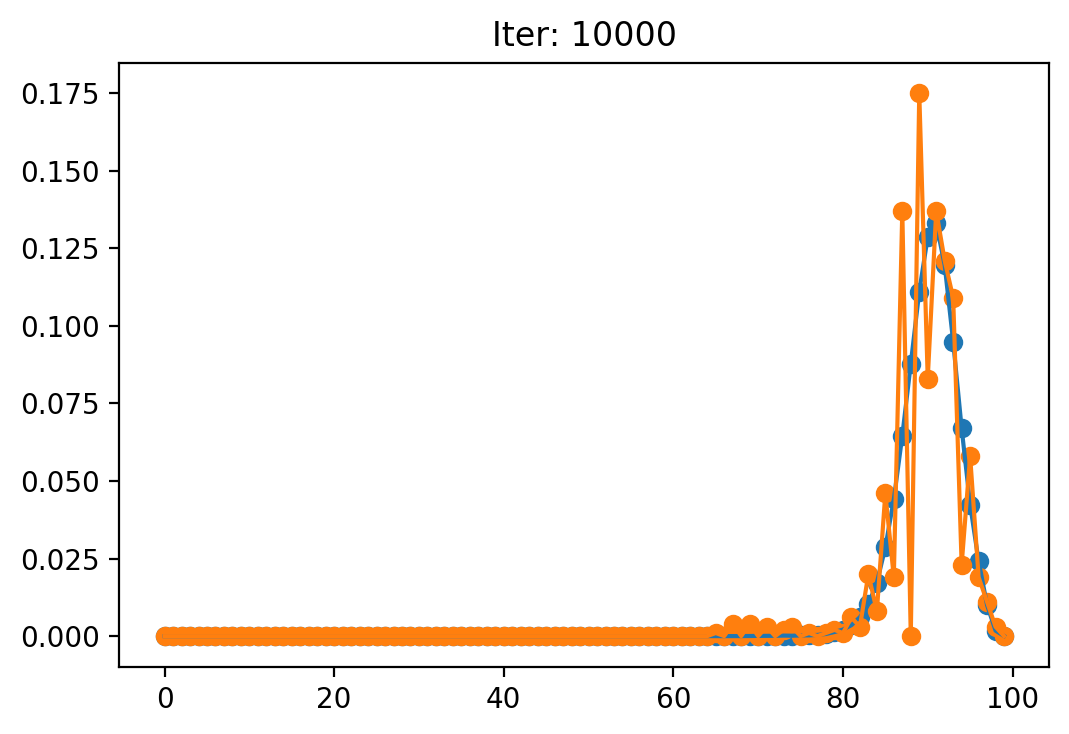

In [4]:
# Hist

fig, ax = plt.subplots(dpi=200)
gif_maker = GIFGenerator(fig)
data = (torch.randn(1000, requires_grad=True) / 18 + 0.5).detach().requires_grad_(True)
optimizer = torch.optim.SGD([data, ], lr=0.1, momentum=0.9)

STEPS = 10000
for i in range(STEPS):
    loss = hist_loss(data, R=100, H_target=H_target_h)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Step: [{i + 1}] / [{STEPS}], Loss: {loss:.4f}")
    data.data = data.data.clamp_(-0.99, 0.99)

    if (i < 1000 and (i + 1) % 5 == 0) or (i > 1000 and (i + 1) % 20 == 0) or (i > 2500 and (i + 1) % 50 == 0):
        plt.clf()  
        plt.plot(H_target)
        plt.scatter(list(range(100)), H_target)

        H_data = data.histc(100, min=-1., max=1.) / data.size(0)
        H_data = H_data.detach()
        plt.plot(H_data)
        plt.scatter(list(range(100)), H_data)
        plt.title(f"Iter: {i + 1}")

        gif_maker.snapshot()
gif_maker.merge('./hist_normal.gif', duration=0.2)

### Similarities Fitting

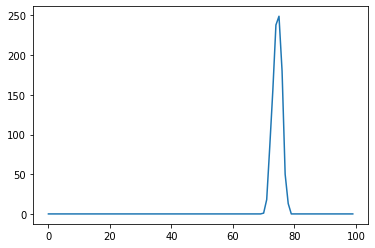

In [27]:
# visualize similarities
mu =  1.
embeddings = torch.randn(45, 512) + 1.

embeddings_norm = F.normalize(embeddings, dim=1)
cos = embeddings_norm.mm(embeddings_norm.t())
similarities = cos[torch.ones_like(cos, dtype=torch.bool).triu(diagonal=1)]
hist = similarities.flatten().histc(100, min=-1., max=1.)
plt.plot(hist.detach())

Step: [1] / [2000], Loss: -0.5665
Step: [2] / [2000], Loss: -0.5666
Step: [3] / [2000], Loss: -0.5668
Step: [4] / [2000], Loss: -0.5670
Step: [5] / [2000], Loss: -0.5672
Step: [6] / [2000], Loss: -0.5676
Step: [7] / [2000], Loss: -0.5680
Step: [8] / [2000], Loss: -0.5684
Step: [9] / [2000], Loss: -0.5688
Step: [10] / [2000], Loss: -0.5693
Step: [11] / [2000], Loss: -0.5698
Step: [12] / [2000], Loss: -0.5704
Step: [13] / [2000], Loss: -0.5709
Step: [14] / [2000], Loss: -0.5715
Step: [15] / [2000], Loss: -0.5721
Step: [16] / [2000], Loss: -0.5728
Step: [17] / [2000], Loss: -0.5734
Step: [18] / [2000], Loss: -0.5741
Step: [19] / [2000], Loss: -0.5748
Step: [20] / [2000], Loss: -0.5755
Step: [21] / [2000], Loss: -0.5762
Step: [22] / [2000], Loss: -0.5770
Step: [23] / [2000], Loss: -0.5777
Step: [24] / [2000], Loss: -0.5784
Step: [25] / [2000], Loss: -0.5792
Step: [26] / [2000], Loss: -0.5800
Step: [27] / [2000], Loss: -0.5807
Step: [28] / [2000], Loss: -0.5815
Step: [29] / [2000], Loss: -0

Step: [241] / [2000], Loss: -0.7328
Step: [242] / [2000], Loss: -0.7328
Step: [243] / [2000], Loss: -0.7331
Step: [244] / [2000], Loss: -0.7337
Step: [245] / [2000], Loss: -0.7340
Step: [246] / [2000], Loss: -0.7338
Step: [247] / [2000], Loss: -0.7339
Step: [248] / [2000], Loss: -0.7340
Step: [249] / [2000], Loss: -0.7336
Step: [250] / [2000], Loss: -0.7330
Step: [251] / [2000], Loss: -0.7332
Step: [252] / [2000], Loss: -0.7334
Step: [253] / [2000], Loss: -0.7334
Step: [254] / [2000], Loss: -0.7335
Step: [255] / [2000], Loss: -0.7331
Step: [256] / [2000], Loss: -0.7326
Step: [257] / [2000], Loss: -0.7325
Step: [258] / [2000], Loss: -0.7323
Step: [259] / [2000], Loss: -0.7322
Step: [260] / [2000], Loss: -0.7319
Step: [261] / [2000], Loss: -0.7318
Step: [262] / [2000], Loss: -0.7314
Step: [263] / [2000], Loss: -0.7307
Step: [264] / [2000], Loss: -0.7297
Step: [265] / [2000], Loss: -0.7298
Step: [266] / [2000], Loss: -0.7293
Step: [267] / [2000], Loss: -0.7294
Step: [268] / [2000], Loss: 

Step: [471] / [2000], Loss: -0.5226
Step: [472] / [2000], Loss: -0.5215
Step: [473] / [2000], Loss: -0.5196
Step: [474] / [2000], Loss: -0.5180
Step: [475] / [2000], Loss: -0.5164
Step: [476] / [2000], Loss: -0.5155
Step: [477] / [2000], Loss: -0.5146
Step: [478] / [2000], Loss: -0.5135
Step: [479] / [2000], Loss: -0.5113
Step: [480] / [2000], Loss: -0.5103
Step: [481] / [2000], Loss: -0.5084
Step: [482] / [2000], Loss: -0.5069
Step: [483] / [2000], Loss: -0.5052
Step: [484] / [2000], Loss: -0.5039
Step: [485] / [2000], Loss: -0.5029
Step: [486] / [2000], Loss: -0.5012
Step: [487] / [2000], Loss: -0.4997
Step: [488] / [2000], Loss: -0.4993
Step: [489] / [2000], Loss: -0.4984
Step: [490] / [2000], Loss: -0.4984
Step: [491] / [2000], Loss: -0.4970
Step: [492] / [2000], Loss: -0.4960
Step: [493] / [2000], Loss: -0.4948
Step: [494] / [2000], Loss: -0.4934
Step: [495] / [2000], Loss: -0.4922
Step: [496] / [2000], Loss: -0.4918
Step: [497] / [2000], Loss: -0.4905
Step: [498] / [2000], Loss: 

Step: [701] / [2000], Loss: -0.3025
Step: [702] / [2000], Loss: -0.3017
Step: [703] / [2000], Loss: -0.3012
Step: [704] / [2000], Loss: -0.2999
Step: [705] / [2000], Loss: -0.2985
Step: [706] / [2000], Loss: -0.2973
Step: [707] / [2000], Loss: -0.2956
Step: [708] / [2000], Loss: -0.2945
Step: [709] / [2000], Loss: -0.2941
Step: [710] / [2000], Loss: -0.2933
Step: [711] / [2000], Loss: -0.2922
Step: [712] / [2000], Loss: -0.2916
Step: [713] / [2000], Loss: -0.2911
Step: [714] / [2000], Loss: -0.2897
Step: [715] / [2000], Loss: -0.2890
Step: [716] / [2000], Loss: -0.2883
Step: [717] / [2000], Loss: -0.2873
Step: [718] / [2000], Loss: -0.2867
Step: [719] / [2000], Loss: -0.2866
Step: [720] / [2000], Loss: -0.2865
Step: [721] / [2000], Loss: -0.2859
Step: [722] / [2000], Loss: -0.2853
Step: [723] / [2000], Loss: -0.2844
Step: [724] / [2000], Loss: -0.2837
Step: [725] / [2000], Loss: -0.2833
Step: [726] / [2000], Loss: -0.2829
Step: [727] / [2000], Loss: -0.2823
Step: [728] / [2000], Loss: 

Step: [936] / [2000], Loss: -0.1684
Step: [937] / [2000], Loss: -0.1682
Step: [938] / [2000], Loss: -0.1677
Step: [939] / [2000], Loss: -0.1674
Step: [940] / [2000], Loss: -0.1673
Step: [941] / [2000], Loss: -0.1667
Step: [942] / [2000], Loss: -0.1658
Step: [943] / [2000], Loss: -0.1655
Step: [944] / [2000], Loss: -0.1654
Step: [945] / [2000], Loss: -0.1648
Step: [946] / [2000], Loss: -0.1643
Step: [947] / [2000], Loss: -0.1639
Step: [948] / [2000], Loss: -0.1637
Step: [949] / [2000], Loss: -0.1631
Step: [950] / [2000], Loss: -0.1628
Step: [951] / [2000], Loss: -0.1626
Step: [952] / [2000], Loss: -0.1627
Step: [953] / [2000], Loss: -0.1621
Step: [954] / [2000], Loss: -0.1618
Step: [955] / [2000], Loss: -0.1613
Step: [956] / [2000], Loss: -0.1608
Step: [957] / [2000], Loss: -0.1598
Step: [958] / [2000], Loss: -0.1594
Step: [959] / [2000], Loss: -0.1592
Step: [960] / [2000], Loss: -0.1590
Step: [961] / [2000], Loss: -0.1586
Step: [962] / [2000], Loss: -0.1582
Step: [963] / [2000], Loss: 

Step: [1161] / [2000], Loss: -0.0974
Step: [1162] / [2000], Loss: -0.0965
Step: [1163] / [2000], Loss: -0.0965
Step: [1164] / [2000], Loss: -0.0963
Step: [1165] / [2000], Loss: -0.0956
Step: [1166] / [2000], Loss: -0.0954
Step: [1167] / [2000], Loss: -0.0950
Step: [1168] / [2000], Loss: -0.0951
Step: [1169] / [2000], Loss: -0.0945
Step: [1170] / [2000], Loss: -0.0944
Step: [1171] / [2000], Loss: -0.0943
Step: [1172] / [2000], Loss: -0.0941
Step: [1173] / [2000], Loss: -0.0937
Step: [1174] / [2000], Loss: -0.0935
Step: [1175] / [2000], Loss: -0.0929
Step: [1176] / [2000], Loss: -0.0923
Step: [1177] / [2000], Loss: -0.0920
Step: [1178] / [2000], Loss: -0.0912
Step: [1179] / [2000], Loss: -0.0912
Step: [1180] / [2000], Loss: -0.0912
Step: [1181] / [2000], Loss: -0.0911
Step: [1182] / [2000], Loss: -0.0911
Step: [1183] / [2000], Loss: -0.0908
Step: [1184] / [2000], Loss: -0.0908
Step: [1185] / [2000], Loss: -0.0903
Step: [1186] / [2000], Loss: -0.0901
Step: [1187] / [2000], Loss: -0.0895
S

Step: [1401] / [2000], Loss: -0.0533
Step: [1402] / [2000], Loss: -0.0533
Step: [1403] / [2000], Loss: -0.0533
Step: [1404] / [2000], Loss: -0.0533
Step: [1405] / [2000], Loss: -0.0533
Step: [1406] / [2000], Loss: -0.0533
Step: [1407] / [2000], Loss: -0.0531
Step: [1408] / [2000], Loss: -0.0529
Step: [1409] / [2000], Loss: -0.0527
Step: [1410] / [2000], Loss: -0.0525
Step: [1411] / [2000], Loss: -0.0524
Step: [1412] / [2000], Loss: -0.0524
Step: [1413] / [2000], Loss: -0.0523
Step: [1414] / [2000], Loss: -0.0523
Step: [1415] / [2000], Loss: -0.0523
Step: [1416] / [2000], Loss: -0.0522
Step: [1417] / [2000], Loss: -0.0522
Step: [1418] / [2000], Loss: -0.0522
Step: [1419] / [2000], Loss: -0.0520
Step: [1420] / [2000], Loss: -0.0518
Step: [1421] / [2000], Loss: -0.0518
Step: [1422] / [2000], Loss: -0.0518
Step: [1423] / [2000], Loss: -0.0518
Step: [1424] / [2000], Loss: -0.0518
Step: [1425] / [2000], Loss: -0.0518
Step: [1426] / [2000], Loss: -0.0518
Step: [1427] / [2000], Loss: -0.0518
S

Step: [1641] / [2000], Loss: -0.0324
Step: [1642] / [2000], Loss: -0.0324
Step: [1643] / [2000], Loss: -0.0323
Step: [1644] / [2000], Loss: -0.0323
Step: [1645] / [2000], Loss: -0.0323
Step: [1646] / [2000], Loss: -0.0323
Step: [1647] / [2000], Loss: -0.0320
Step: [1648] / [2000], Loss: -0.0320
Step: [1649] / [2000], Loss: -0.0320
Step: [1650] / [2000], Loss: -0.0318
Step: [1651] / [2000], Loss: -0.0316
Step: [1652] / [2000], Loss: -0.0316
Step: [1653] / [2000], Loss: -0.0316
Step: [1654] / [2000], Loss: -0.0316
Step: [1655] / [2000], Loss: -0.0314
Step: [1656] / [2000], Loss: -0.0314
Step: [1657] / [2000], Loss: -0.0314
Step: [1658] / [2000], Loss: -0.0314
Step: [1659] / [2000], Loss: -0.0314
Step: [1660] / [2000], Loss: -0.0309
Step: [1661] / [2000], Loss: -0.0309
Step: [1662] / [2000], Loss: -0.0309
Step: [1663] / [2000], Loss: -0.0309
Step: [1664] / [2000], Loss: -0.0307
Step: [1665] / [2000], Loss: -0.0307
Step: [1666] / [2000], Loss: -0.0307
Step: [1667] / [2000], Loss: -0.0307
S

Step: [1881] / [2000], Loss: -0.0195
Step: [1882] / [2000], Loss: -0.0195
Step: [1883] / [2000], Loss: -0.0195
Step: [1884] / [2000], Loss: -0.0195
Step: [1885] / [2000], Loss: -0.0194
Step: [1886] / [2000], Loss: -0.0193
Step: [1887] / [2000], Loss: -0.0193
Step: [1888] / [2000], Loss: -0.0193
Step: [1889] / [2000], Loss: -0.0193
Step: [1890] / [2000], Loss: -0.0193
Step: [1891] / [2000], Loss: -0.0193
Step: [1892] / [2000], Loss: -0.0192
Step: [1893] / [2000], Loss: -0.0192
Step: [1894] / [2000], Loss: -0.0188
Step: [1895] / [2000], Loss: -0.0188
Step: [1896] / [2000], Loss: -0.0186
Step: [1897] / [2000], Loss: -0.0184
Step: [1898] / [2000], Loss: -0.0184
Step: [1899] / [2000], Loss: -0.0184
Step: [1900] / [2000], Loss: -0.0184
Step: [1901] / [2000], Loss: -0.0183
Step: [1902] / [2000], Loss: -0.0182
Step: [1903] / [2000], Loss: -0.0182
Step: [1904] / [2000], Loss: -0.0182
Step: [1905] / [2000], Loss: -0.0182
Step: [1906] / [2000], Loss: -0.0182
Step: [1907] / [2000], Loss: -0.0182
S

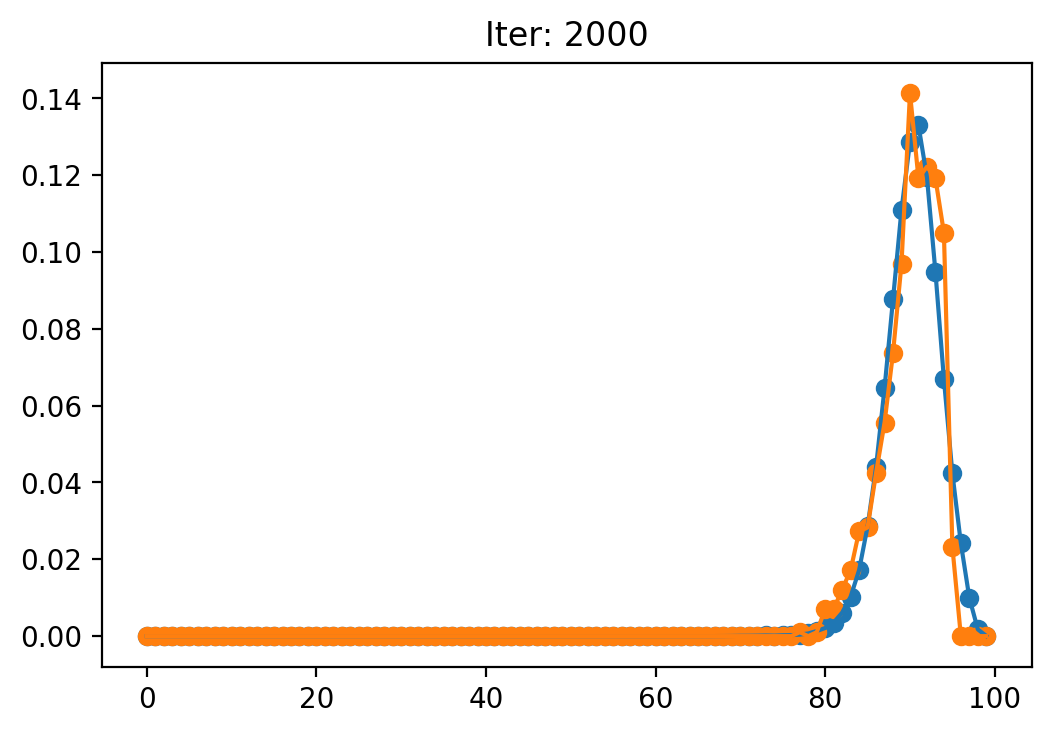

In [32]:
# Gravity optimize

fig, ax = plt.subplots(dpi=200)
gif_maker = GIFGenerator(fig)

mu =  1.
embeddings = torch.randn(45, 512) + 1.
embeddings.requires_grad_(True)
optimizer = torch.optim.SGD([embeddings, ], lr=2., momentum=0.9)

STEPS = 2000
for i in range(STEPS):
    embeddings_norm = F.normalize(embeddings, dim=1)
    cos = embeddings_norm.mm(embeddings_norm.t())
    similarities = cos[torch.ones_like(cos, dtype=torch.bool).triu(diagonal=1)]
    loss = hist_loss_beta(similarities, R=100, H_target=H_target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Step: [{i + 1}] / [{STEPS}], Loss: {loss:.4f}")

    if (i < 1000 and (i + 1) % 5 == 0) or (i > 1000 and (i + 1) % 20 == 0) or (i > 2500 and (i + 1) % 50 == 0):
        plt.clf()
        plt.plot(H_target)
        plt.scatter(list(range(100)), H_target)
        
        embeddings_norm = F.normalize(embeddings, dim=1)
        cos = embeddings_norm.mm(embeddings_norm.t())
        similarities = cos[torch.ones_like(cos, dtype=torch.bool).triu(diagonal=1)]
        H_data = similarities.histc(100, min=-1., max=1.) / similarities.size(0)
        H_data = H_data.detach()
        plt.plot(H_data)
        plt.scatter(list(range(100)), H_data)
        plt.title(f"Iter: {i + 1}")

        gif_maker.snapshot()
gif_maker.merge('./gravity_embedding_fitting.gif', duration=0.2)

Step: [1] / [2000], Loss: 0.6844
Step: [2] / [2000], Loss: 0.6844
Step: [3] / [2000], Loss: 0.6844
Step: [4] / [2000], Loss: 0.6844
Step: [5] / [2000], Loss: 0.6844
Step: [6] / [2000], Loss: 0.6843
Step: [7] / [2000], Loss: 0.6843
Step: [8] / [2000], Loss: 0.6843
Step: [9] / [2000], Loss: 0.6842
Step: [10] / [2000], Loss: 0.6842
Step: [11] / [2000], Loss: 0.6842
Step: [12] / [2000], Loss: 0.6841
Step: [13] / [2000], Loss: 0.6841
Step: [14] / [2000], Loss: 0.6841
Step: [15] / [2000], Loss: 0.6840
Step: [16] / [2000], Loss: 0.6840
Step: [17] / [2000], Loss: 0.6840
Step: [18] / [2000], Loss: 0.6839
Step: [19] / [2000], Loss: 0.6839
Step: [20] / [2000], Loss: 0.6839
Step: [21] / [2000], Loss: 0.6838
Step: [22] / [2000], Loss: 0.6838
Step: [23] / [2000], Loss: 0.6838
Step: [24] / [2000], Loss: 0.6838
Step: [25] / [2000], Loss: 0.6837
Step: [26] / [2000], Loss: 0.6837
Step: [27] / [2000], Loss: 0.6837
Step: [28] / [2000], Loss: 0.6836
Step: [29] / [2000], Loss: 0.6836
Step: [30] / [2000], Lo

Step: [241] / [2000], Loss: 0.6702
Step: [242] / [2000], Loss: 0.6701
Step: [243] / [2000], Loss: 0.6701
Step: [244] / [2000], Loss: 0.6700
Step: [245] / [2000], Loss: 0.6699
Step: [246] / [2000], Loss: 0.6698
Step: [247] / [2000], Loss: 0.6697
Step: [248] / [2000], Loss: 0.6695
Step: [249] / [2000], Loss: 0.6694
Step: [250] / [2000], Loss: 0.6693
Step: [251] / [2000], Loss: 0.6692
Step: [252] / [2000], Loss: 0.6691
Step: [253] / [2000], Loss: 0.6690
Step: [254] / [2000], Loss: 0.6689
Step: [255] / [2000], Loss: 0.6688
Step: [256] / [2000], Loss: 0.6687
Step: [257] / [2000], Loss: 0.6686
Step: [258] / [2000], Loss: 0.6685
Step: [259] / [2000], Loss: 0.6684
Step: [260] / [2000], Loss: 0.6683
Step: [261] / [2000], Loss: 0.6681
Step: [262] / [2000], Loss: 0.6680
Step: [263] / [2000], Loss: 0.6678
Step: [264] / [2000], Loss: 0.6677
Step: [265] / [2000], Loss: 0.6676
Step: [266] / [2000], Loss: 0.6674
Step: [267] / [2000], Loss: 0.6673
Step: [268] / [2000], Loss: 0.6671
Step: [269] / [2000]

Step: [478] / [2000], Loss: 0.6293
Step: [479] / [2000], Loss: 0.6291
Step: [480] / [2000], Loss: 0.6289
Step: [481] / [2000], Loss: 0.6287
Step: [482] / [2000], Loss: 0.6285
Step: [483] / [2000], Loss: 0.6282
Step: [484] / [2000], Loss: 0.6280
Step: [485] / [2000], Loss: 0.6278
Step: [486] / [2000], Loss: 0.6276
Step: [487] / [2000], Loss: 0.6274
Step: [488] / [2000], Loss: 0.6272
Step: [489] / [2000], Loss: 0.6270
Step: [490] / [2000], Loss: 0.6268
Step: [491] / [2000], Loss: 0.6266
Step: [492] / [2000], Loss: 0.6264
Step: [493] / [2000], Loss: 0.6262
Step: [494] / [2000], Loss: 0.6260
Step: [495] / [2000], Loss: 0.6258
Step: [496] / [2000], Loss: 0.6256
Step: [497] / [2000], Loss: 0.6254
Step: [498] / [2000], Loss: 0.6252
Step: [499] / [2000], Loss: 0.6250
Step: [500] / [2000], Loss: 0.6248
Step: [501] / [2000], Loss: 0.6246
Step: [502] / [2000], Loss: 0.6244
Step: [503] / [2000], Loss: 0.6242
Step: [504] / [2000], Loss: 0.6240
Step: [505] / [2000], Loss: 0.6238
Step: [506] / [2000]

Step: [715] / [2000], Loss: 0.5777
Step: [716] / [2000], Loss: 0.5774
Step: [717] / [2000], Loss: 0.5772
Step: [718] / [2000], Loss: 0.5769
Step: [719] / [2000], Loss: 0.5766
Step: [720] / [2000], Loss: 0.5764
Step: [721] / [2000], Loss: 0.5761
Step: [722] / [2000], Loss: 0.5759
Step: [723] / [2000], Loss: 0.5756
Step: [724] / [2000], Loss: 0.5753
Step: [725] / [2000], Loss: 0.5751
Step: [726] / [2000], Loss: 0.5748
Step: [727] / [2000], Loss: 0.5745
Step: [728] / [2000], Loss: 0.5742
Step: [729] / [2000], Loss: 0.5740
Step: [730] / [2000], Loss: 0.5737
Step: [731] / [2000], Loss: 0.5734
Step: [732] / [2000], Loss: 0.5731
Step: [733] / [2000], Loss: 0.5728
Step: [734] / [2000], Loss: 0.5725
Step: [735] / [2000], Loss: 0.5722
Step: [736] / [2000], Loss: 0.5718
Step: [737] / [2000], Loss: 0.5715
Step: [738] / [2000], Loss: 0.5712
Step: [739] / [2000], Loss: 0.5708
Step: [740] / [2000], Loss: 0.5705
Step: [741] / [2000], Loss: 0.5701
Step: [742] / [2000], Loss: 0.5698
Step: [743] / [2000]

Step: [951] / [2000], Loss: 0.4600
Step: [952] / [2000], Loss: 0.4592
Step: [953] / [2000], Loss: 0.4585
Step: [954] / [2000], Loss: 0.4577
Step: [955] / [2000], Loss: 0.4569
Step: [956] / [2000], Loss: 0.4561
Step: [957] / [2000], Loss: 0.4554
Step: [958] / [2000], Loss: 0.4546
Step: [959] / [2000], Loss: 0.4538
Step: [960] / [2000], Loss: 0.4530
Step: [961] / [2000], Loss: 0.4522
Step: [962] / [2000], Loss: 0.4515
Step: [963] / [2000], Loss: 0.4507
Step: [964] / [2000], Loss: 0.4499
Step: [965] / [2000], Loss: 0.4491
Step: [966] / [2000], Loss: 0.4483
Step: [967] / [2000], Loss: 0.4475
Step: [968] / [2000], Loss: 0.4466
Step: [969] / [2000], Loss: 0.4458
Step: [970] / [2000], Loss: 0.4450
Step: [971] / [2000], Loss: 0.4441
Step: [972] / [2000], Loss: 0.4433
Step: [973] / [2000], Loss: 0.4424
Step: [974] / [2000], Loss: 0.4416
Step: [975] / [2000], Loss: 0.4408
Step: [976] / [2000], Loss: 0.4399
Step: [977] / [2000], Loss: 0.4390
Step: [978] / [2000], Loss: 0.4382
Step: [979] / [2000]

Step: [1181] / [2000], Loss: 0.2297
Step: [1182] / [2000], Loss: 0.2286
Step: [1183] / [2000], Loss: 0.2275
Step: [1184] / [2000], Loss: 0.2264
Step: [1185] / [2000], Loss: 0.2253
Step: [1186] / [2000], Loss: 0.2243
Step: [1187] / [2000], Loss: 0.2232
Step: [1188] / [2000], Loss: 0.2221
Step: [1189] / [2000], Loss: 0.2211
Step: [1190] / [2000], Loss: 0.2200
Step: [1191] / [2000], Loss: 0.2189
Step: [1192] / [2000], Loss: 0.2179
Step: [1193] / [2000], Loss: 0.2168
Step: [1194] / [2000], Loss: 0.2157
Step: [1195] / [2000], Loss: 0.2147
Step: [1196] / [2000], Loss: 0.2136
Step: [1197] / [2000], Loss: 0.2126
Step: [1198] / [2000], Loss: 0.2115
Step: [1199] / [2000], Loss: 0.2105
Step: [1200] / [2000], Loss: 0.2094
Step: [1201] / [2000], Loss: 0.2084
Step: [1202] / [2000], Loss: 0.2073
Step: [1203] / [2000], Loss: 0.2063
Step: [1204] / [2000], Loss: 0.2053
Step: [1205] / [2000], Loss: 0.2042
Step: [1206] / [2000], Loss: 0.2032
Step: [1207] / [2000], Loss: 0.2021
Step: [1208] / [2000], Loss:

Step: [1409] / [2000], Loss: 0.0539
Step: [1410] / [2000], Loss: 0.0535
Step: [1411] / [2000], Loss: 0.0532
Step: [1412] / [2000], Loss: 0.0528
Step: [1413] / [2000], Loss: 0.0524
Step: [1414] / [2000], Loss: 0.0520
Step: [1415] / [2000], Loss: 0.0517
Step: [1416] / [2000], Loss: 0.0513
Step: [1417] / [2000], Loss: 0.0509
Step: [1418] / [2000], Loss: 0.0506
Step: [1419] / [2000], Loss: 0.0502
Step: [1420] / [2000], Loss: 0.0499
Step: [1421] / [2000], Loss: 0.0495
Step: [1422] / [2000], Loss: 0.0491
Step: [1423] / [2000], Loss: 0.0488
Step: [1424] / [2000], Loss: 0.0484
Step: [1425] / [2000], Loss: 0.0481
Step: [1426] / [2000], Loss: 0.0478
Step: [1427] / [2000], Loss: 0.0474
Step: [1428] / [2000], Loss: 0.0471
Step: [1429] / [2000], Loss: 0.0467
Step: [1430] / [2000], Loss: 0.0464
Step: [1431] / [2000], Loss: 0.0460
Step: [1432] / [2000], Loss: 0.0457
Step: [1433] / [2000], Loss: 0.0454
Step: [1434] / [2000], Loss: 0.0450
Step: [1435] / [2000], Loss: 0.0447
Step: [1436] / [2000], Loss:

Step: [1637] / [2000], Loss: 0.0102
Step: [1638] / [2000], Loss: 0.0101
Step: [1639] / [2000], Loss: 0.0100
Step: [1640] / [2000], Loss: 0.0100
Step: [1641] / [2000], Loss: 0.0099
Step: [1642] / [2000], Loss: 0.0099
Step: [1643] / [2000], Loss: 0.0098
Step: [1644] / [2000], Loss: 0.0097
Step: [1645] / [2000], Loss: 0.0097
Step: [1646] / [2000], Loss: 0.0096
Step: [1647] / [2000], Loss: 0.0096
Step: [1648] / [2000], Loss: 0.0095
Step: [1649] / [2000], Loss: 0.0095
Step: [1650] / [2000], Loss: 0.0094
Step: [1651] / [2000], Loss: 0.0093
Step: [1652] / [2000], Loss: 0.0093
Step: [1653] / [2000], Loss: 0.0092
Step: [1654] / [2000], Loss: 0.0092
Step: [1655] / [2000], Loss: 0.0091
Step: [1656] / [2000], Loss: 0.0091
Step: [1657] / [2000], Loss: 0.0090
Step: [1658] / [2000], Loss: 0.0090
Step: [1659] / [2000], Loss: 0.0089
Step: [1660] / [2000], Loss: 0.0089
Step: [1661] / [2000], Loss: 0.0088
Step: [1662] / [2000], Loss: 0.0088
Step: [1663] / [2000], Loss: 0.0087
Step: [1664] / [2000], Loss:

Step: [1865] / [2000], Loss: 0.0040
Step: [1866] / [2000], Loss: 0.0040
Step: [1867] / [2000], Loss: 0.0040
Step: [1868] / [2000], Loss: 0.0040
Step: [1869] / [2000], Loss: 0.0040
Step: [1870] / [2000], Loss: 0.0039
Step: [1871] / [2000], Loss: 0.0039
Step: [1872] / [2000], Loss: 0.0039
Step: [1873] / [2000], Loss: 0.0039
Step: [1874] / [2000], Loss: 0.0039
Step: [1875] / [2000], Loss: 0.0039
Step: [1876] / [2000], Loss: 0.0039
Step: [1877] / [2000], Loss: 0.0039
Step: [1878] / [2000], Loss: 0.0039
Step: [1879] / [2000], Loss: 0.0038
Step: [1880] / [2000], Loss: 0.0038
Step: [1881] / [2000], Loss: 0.0038
Step: [1882] / [2000], Loss: 0.0038
Step: [1883] / [2000], Loss: 0.0038
Step: [1884] / [2000], Loss: 0.0038
Step: [1885] / [2000], Loss: 0.0038
Step: [1886] / [2000], Loss: 0.0038
Step: [1887] / [2000], Loss: 0.0037
Step: [1888] / [2000], Loss: 0.0037
Step: [1889] / [2000], Loss: 0.0037
Step: [1890] / [2000], Loss: 0.0037
Step: [1891] / [2000], Loss: 0.0037
Step: [1892] / [2000], Loss:

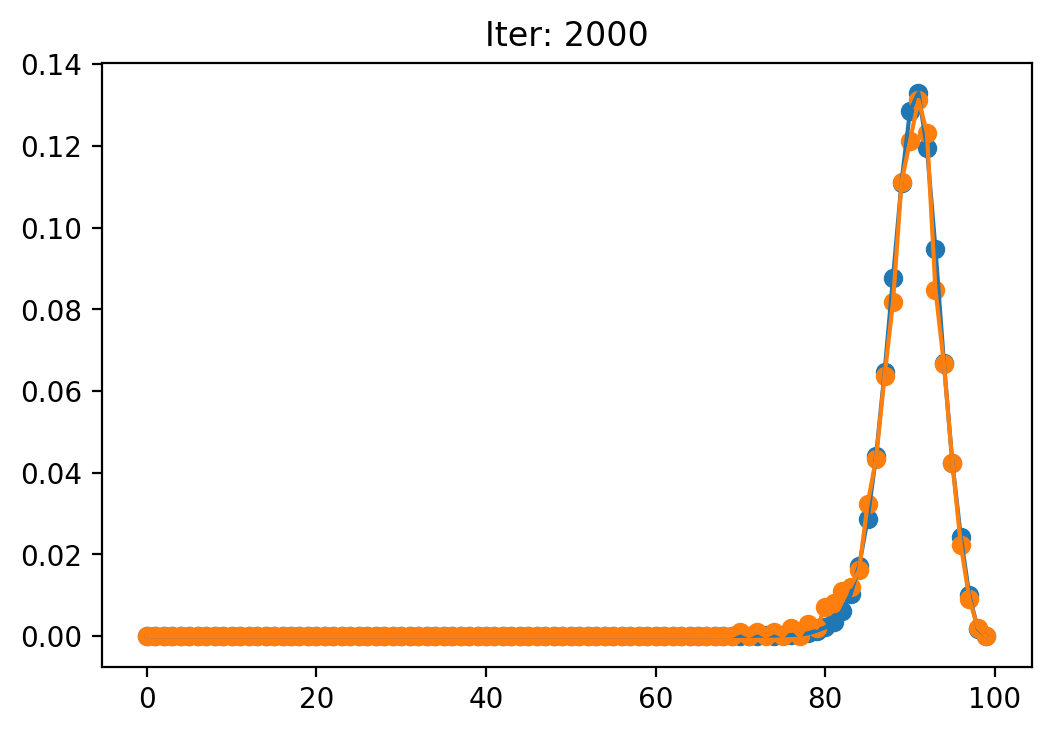

In [31]:
# Hist optimize

fig, ax = plt.subplots(dpi=200)
gif_maker = GIFGenerator(fig)

mu =  1.
embeddings = torch.randn(45, 512) + 1.
embeddings.requires_grad_(True)
optimizer = torch.optim.SGD([embeddings, ], lr=1., momentum=0.9)

STEPS = 2000
for i in range(STEPS):
    embeddings_norm = F.normalize(embeddings, dim=1)
    cos = embeddings_norm.mm(embeddings_norm.t())
    similarities = cos[torch.ones_like(cos, dtype=torch.bool).triu(diagonal=1)]
    
    loss = hist_loss(similarities, R=100, H_target=H_target_h)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Step: [{i + 1}] / [{STEPS}], Loss: {loss:.4f}")

    if (i < 1000 and (i + 1) % 5 == 0) or (i > 1000 and (i + 1) % 20 == 0) or (i > 2500 and (i + 1) % 50 == 0):
        plt.clf()
        plt.plot(H_target)
        plt.scatter(list(range(100)), H_target)
        
        embeddings_norm = F.normalize(embeddings, dim=1)
        cos = embeddings_norm.mm(embeddings_norm.t())
        similarities = cos[torch.ones_like(cos, dtype=torch.bool).triu(diagonal=1)]
        H_data = similarities.histc(100, min=-1., max=1.) / similarities.size(0)
        H_data = H_data.detach()
        plt.plot(H_data)
        plt.scatter(list(range(100)), H_data)
        plt.title(f"Iter: {i + 1}")

        gif_maker.snapshot()
gif_maker.merge('./hist_embedding_fitting.gif', duration=0.2)